<a href="https://colab.research.google.com/github/LucasSFlores80/Data-Science-I/blob/main/Proyecto_DS_ParteIII_Flores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Data Science I

El presente proyecto surge a partir de la inquietud de analizar como se relacionan los fallecimientos en el mundo, a partir de ciertos factores de riesgo de la salud recopilados en un dataset. El dataset contiene la información de 192 países y 23 regiones junto a 30 factores de riesgo en el intervalo de tiempo que va desde 1990 a 2019.

Para comenzar el análisis, se considera un solo país en estudio, que es, la República Argentina. Luego de una búsqueda bibliográfica en páginas de la Organización Mundial de la Salud y en el Ministerio de Salud de la Argentina, se encuentra que la mayor proporción de fallecimientos en la Argentina se debe a las enfermedades del corazón o enfermedades cardiovasculares en el rango del 35%.

Al investigar el dataset, la enfermedad cardiovascular o coronaria no se encuentra como factor de riesgo propiamente dicho. Las enfermedades cardiovasculares resultan de diferentes factores que si están en el dataset y por lo tanto, se deciden investigar y analizar.

Según la OMS, los principales factores que propician las enfermedades coronarias son:

*   Alimentación poco saludable (sobre todo por un bajo consumo de frutas y verduras).
*   Consumo elevado de sal.
*   Poca actividad física.
*   Hipertensión.
*   Hiperglucemia.
*   Tabaquismo.
*   Sobrepeso y obesidad (IMC alto).
*   Alcoholismo.

Con estos factores definidos, se decide avanzar con el análisis de los datos. En primer lugar, se estudia como varía cada factor a lo largo de los años y en segundo lugar, cual es la tendencia cuando se suman todos de los factores.

Finalmente, se plantean varias preguntas que buscan ser respondidas:

1) ¿Cuál es la proporción o porcentaje de incidencia de las enfermedades cardiovasculares en el total de fallecimientos de la República Argentina?

2) ¿Los decesos asociados a los diferentes factores aumentaron o disminuyeron a lo largo de los años? Si subieron o bajaron ¿a qué se debe?

3) En general, ¿los fallecimientos asociados a la enfermedad cardiovascular aumentaron o disminuyeron desde 1990 a 2019?

4) ¿Aplicando algún modelo de aprendizaje se puede predecir como van a variar los diferentes factores en un intervalo de tiempo?

Fuentes:

https://iris.who.int/bitstream/handle/10665/136892/ccsbrief_arg_en.pdf?sequence=1

https://bancos.salud.gob.ar/sites/default/files/2023-12/boletin_mortalidad_ent_6122023.pdf

https://www.paho.org/es/temas/enfermedades-cardiovasculares

https://www.who.int/es/health-topics/cardiovascular-diseases#tab=

Fuente del dataset:

https://www.kaggle.com/datasets/muhammadumairab/number-of-deaths-by-risk-factor








#Parte 1: Carga del Dataset

Primero se cargan las librerías necesarias. En este caso se utiliza pandas y numpy



In [247]:
import pandas as pd
import numpy as np

Se carga el dataset teniendo en cuenta que se trata de un archivo con extensión .csv. Por una cuestión de conveniencia se deja el índice por defecto.

In [248]:
url = 'https://raw.githubusercontent.com/LucasSFlores80/Data-Science-I/main/number-of-deaths-by-risk-factor.csv'
riesgo = pd.read_csv(url)
riesgo

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number),...,Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Discontinued breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2835,11483,1063,1354,4854,1820,4336,...,5636,2879,4328,1068,407,138,730,21,734,282
6836,Zimbabwe,ZWE,2016,2781,11663,1082,1383,4915,1854,4244,...,5849,2798,4295,1042,415,101,674,20,700,275
6837,Zimbabwe,ZWE,2017,2700,11819,1098,1409,4992,1883,4193,...,6047,2744,4251,1007,424,82,629,19,678,267
6838,Zimbabwe,ZWE,2018,2669,12002,1117,1439,5044,1917,4013,...,6248,2608,4153,969,434,85,607,17,644,261


Se observa que el dataset consta de 31 columnas y 6480 filas. La información que brinda es la cantidad de decesos por tipo de riesgo en distintos países y regiones en un intervalo de años (1990-2019).

Los riesgos son variables categóricas (cualitativa nominal porque no se pueden ordenar o clasificar pero si seleccionar). Los nombres y códigos de los países también son categóricas (cualitativa ordinal porque se pueden organizar bajo algún criterio como orden alfabético).

Analizando las columnas se observa que contienen el nombre de los países, un código de país, el año y los diferentes riesgos en la salud.
Salvo las variables Entity y Code que son de tipo string, el resto son variables tipo número entero (int).

In [249]:
riesgo .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 31 columns):
 #   Column                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                            --------------  ----- 
 0   Entity                                                                                                            6840 non-null   object
 1   Code                                                                                                              6150 non-null   object
 2   Year                                                                                                              6840 non-null   int64 
 3   Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)              6840 non-null   int64 
 4   Deaths - Cause: All causes - Risk: H

El nombre de las columnas de los riegos es muy extensa en todos los casos. Por lo tanto, es recomendable cambiarlos por otro nombre o código.

Se renombran las columnas de acuerdo a la tabla

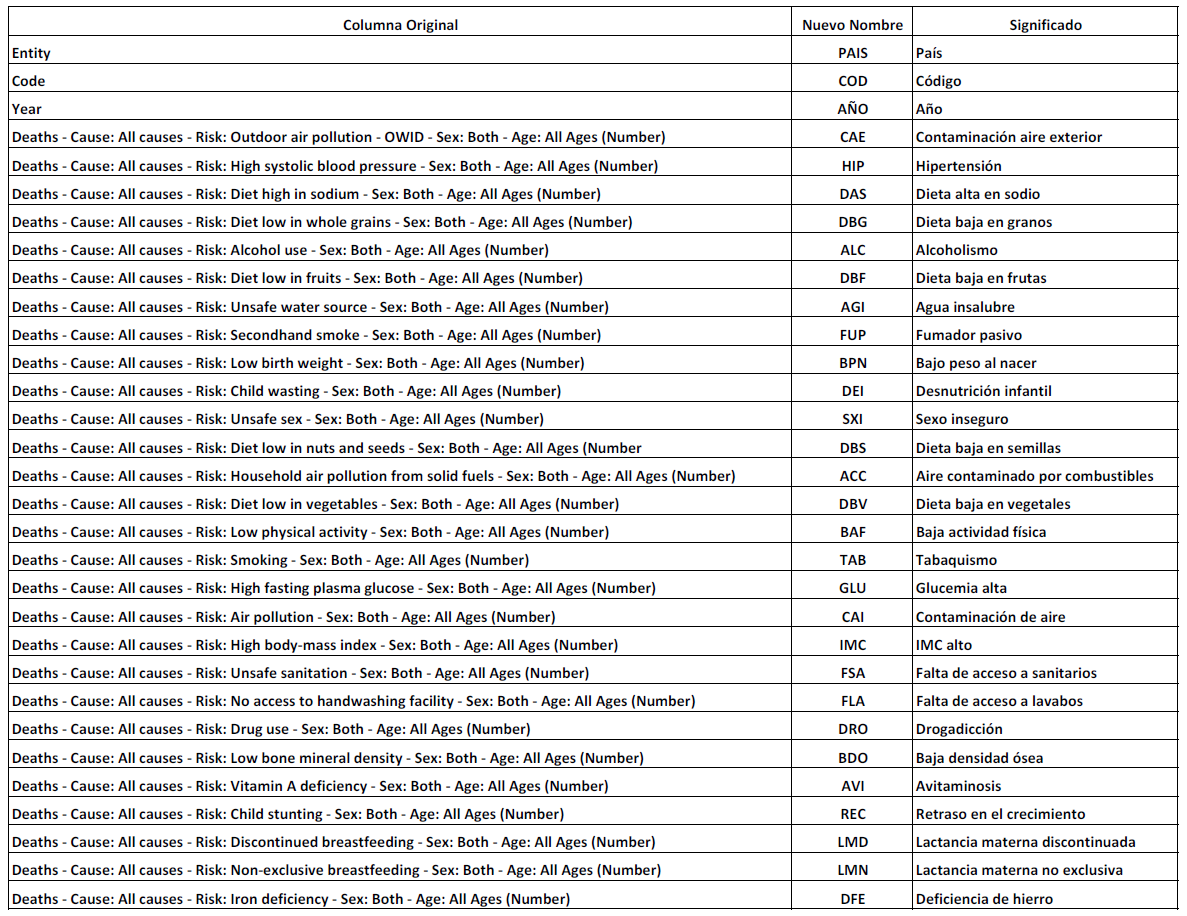

In [250]:
riesgo_1 = riesgo.rename(columns={"Entity":"PAIS","Code":"COD", "Year":"AÑO","Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)":"CAE","Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number)":"HIP","Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number)":"DAS","Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number)":"DBG","Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)":"ALC","Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number)":"DBF","Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)":"AGI","Deaths - Cause: All causes - Risk: Secondhand smoke - Sex: Both - Age: All Ages (Number)":"FUP","Deaths - Cause: All causes - Risk: Low birth weight - Sex: Both - Age: All Ages (Number)":"BPN","Deaths - Cause: All causes - Risk: Child wasting - Sex: Both - Age: All Ages (Number)":"DEI","Deaths - Cause: All causes - Risk: Unsafe sex - Sex: Both - Age: All Ages (Number)":"SXI","Deaths - Cause: All causes - Risk: Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number)":"DBS","Deaths - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)":"ACC","Deaths - Cause: All causes - Risk: Diet low in vegetables - Sex: Both - Age: All Ages (Number)":"DBV","Deaths - Cause: All causes - Risk: Low physical activity - Sex: Both - Age: All Ages (Number)":"BAF","Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: All Ages (Number)":"TAB","Deaths - Cause: All causes - Risk: High fasting plasma glucose - Sex: Both - Age: All Ages (Number)":"GLU","Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: All Ages (Number)":"CAI","Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number)":"IMC","Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number)":"FSA","Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number)":"FLA","Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number)":"DRO","Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number)":"BDO","Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number)":"AVI","Deaths - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number)":"REC","Deaths - Cause: All causes - Risk: Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)":"LMD","Deaths - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)":"LMN","Deaths - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)":"DFE"})

Se comprueba que los cambios fueron correctos

In [251]:
riesgo_1.columns

Index(['PAIS', 'COD', 'AÑO', 'CAE', 'HIP', 'DAS', 'DBG', 'ALC', 'DBF', 'AGI',
       'FUP', 'BPN', 'DEI', 'SXI', 'DBS', 'ACC', 'DBV', 'BAF', 'TAB', 'GLU',
       'CAI', 'IMC', 'FSA', 'FLA', 'DRO', 'BDO', 'AVI', 'REC', 'LMD', 'LMN',
       'DFE'],
      dtype='object')

Se vuelve a mostrar el dataset para ver si realmente se hicieron los cambios

In [252]:
riesgo_1.head()

,PAIS,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812


In [253]:
riesgo_1.tail()

,PAIS,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
6835,Zimbabwe,ZWE,2015,2835,11483,1063,1354,4854,1820,4336,...,5636,2879,4328,1068,407,138,730,21,734,282
6836,Zimbabwe,ZWE,2016,2781,11663,1082,1383,4915,1854,4244,...,5849,2798,4295,1042,415,101,674,20,700,275
6837,Zimbabwe,ZWE,2017,2700,11819,1098,1409,4992,1883,4193,...,6047,2744,4251,1007,424,82,629,19,678,267
6838,Zimbabwe,ZWE,2018,2669,12002,1117,1439,5044,1917,4013,...,6248,2608,4153,969,434,85,607,17,644,261
6839,Zimbabwe,ZWE,2019,2680,12241,1140,1475,5156,1960,3914,...,6475,2531,4113,963,438,81,585,16,631,259


# Parte 2: Análisis de datos nulos
Se determina la cantidad de datos nulo, como influyen en el dataset y el análisis de las variables.

Total de datos nulos

In [254]:
riesgo_1.isnull().sum().sum()

690

Son 690 datos nulos. Se analiza en que columna están los datos nulos

In [255]:
riesgo_1.isnull().sum()

PAIS      0
COD     690
AÑO       0
CAE       0
HIP       0
DAS       0
DBG       0
ALC       0
DBF       0
AGI       0
FUP       0
BPN       0
DEI       0
SXI       0
DBS       0
ACC       0
DBV       0
BAF       0
TAB       0
GLU       0
CAI       0
IMC       0
FSA       0
FLA       0
DRO       0
BDO       0
AVI       0
REC       0
LMD       0
LMN       0
DFE       0
dtype: int64

Los datos nulos están en la columna de Código de País. Se decide cambiar estos datos por la palabra "REGION", dado que, en un análisis visual del dataset se encuentra que los datos nulos corresponden a regiones como América Latina o los países que forman Reino Unido.

Estos datos no se borran, sino, que se agrupan para poder ser analizados y comparados con otros datos, como los países. Por ejemplo, si se toma América Latina, se puede comparar los datos de los riesgos de muerte con los países que forman la región.

In [256]:
riesgo_2 = riesgo_1.fillna('REGION')

Se comprueba si quedaron datos nulos

In [257]:
riesgo_2.isnull().sum().sum()

0

Se comprueba la no existencia de datos nulos por columna del dataset

In [258]:
riesgo_2.isnull().sum()

PAIS    0
COD     0
AÑO     0
CAE     0
HIP     0
DAS     0
DBG     0
ALC     0
DBF     0
AGI     0
FUP     0
BPN     0
DEI     0
SXI     0
DBS     0
ACC     0
DBV     0
BAF     0
TAB     0
GLU     0
CAI     0
IMC     0
FSA     0
FLA     0
DRO     0
BDO     0
AVI     0
REC     0
LMD     0
LMN     0
DFE     0
dtype: int64

Se hace una búsqueda en el dataset utilizando como palabra clave "REGION" en la columna de COD.

In [259]:
region = riesgo_2.loc[riesgo_2['COD']=='REGION']
region

,PAIS,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
30,African Region (WHO),REGION,1990,93970,356866,46758,45763,175615,43476,809960,...,119182,604349,473096,8214,13858,101145,305355,10812,168704,18607
31,African Region (WHO),REGION,1991,96436,365975,47439,46897,179795,44504,829073,...,123606,618112,481775,10201,14292,100842,308125,11186,175016,18768
32,African Region (WHO),REGION,1992,99700,377948,48304,48317,184243,45996,819085,...,129692,610436,480386,12749,14774,99075,307088,11006,172502,19064
33,African Region (WHO),REGION,1993,101913,386490,48805,49393,186482,46972,815640,...,132880,607549,480444,15605,15037,97309,305786,10929,172418,19209
34,African Region (WHO),REGION,1994,105532,398794,49520,50736,191043,48357,832168,...,139411,619531,488628,19030,15490,96777,306251,10970,174425,19504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6745,World Bank Upper Middle Income,REGION,2015,1953125,4298815,1046866,711062,961051,348914,34910,...,1804399,16788,37778,158483,131969,251,5176,728,9657,1985
6746,World Bank Upper Middle Income,REGION,2016,1969630,4389967,1065553,724482,968200,350770,34179,...,1860369,16072,37789,161699,135254,246,4929,681,9098,1903
6747,World Bank Upper Middle Income,REGION,2017,1965467,4440677,1076496,733454,969102,350295,33561,...,1901543,15374,36961,161312,137207,223,4508,645,8192,1811
6748,World Bank Upper Middle Income,REGION,2018,1976456,4514262,1089508,746871,982487,352573,32732,...,1955352,14565,36002,162808,139013,197,4056,599,7479,1767


Los cambios han sido correctos. Ahora resta saber cuales son las regiones en cuestión. Para hacer esto, se realiza una búsqueda de COD con la clave "REGION" y un solo año para poder registrar todas ellas.

In [260]:
region.loc[(region['COD']=='REGION') & (region['AÑO']==1990)]

,PAIS,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
30,African Region (WHO),REGION,1990,93970,356866,46758,45763,175615,43476,809960,...,119182,604349,473096,8214,13858,101145,305355,10812,168704,18607
1620,East Asia & Pacific (WB),REGION,1990,792223,1973214,755103,210099,528615,297249,275997,...,387912,206690,139031,110484,56573,21453,140216,5542,113390,8918
1650,Eastern Mediterranean Region (WHO),REGION,1990,167123,405188,21227,102805,18994,34370,208692,...,168996,156608,83308,7917,10072,27726,95377,4342,54890,6665
1770,England,REGION,1990,36407,156715,9076,30295,6497,13775,6,...,52247,1,326,1381,2186,0,7,1,30,7
1950,Europe & Central Asia (WB),REGION,1990,622626,2384980,309584,514849,501232,193996,13647,...,941856,10934,12788,42044,53416,767,11575,660,14463,761
1980,European Region (WHO),REGION,1990,627103,2399430,312367,518009,502397,194493,13734,...,947836,10984,12806,42225,53617,774,11598,669,14556,763
2100,G20,REGION,1990,1729558,5083835,1076589,842300,1253650,608857,1174104,...,1606024,892544,519419,197175,160938,60853,331514,14476,211652,39318
3120,Latin America & Caribbean (WB),REGION,1990,105709,368306,54633,68240,143156,31306,94378,...,200289,61138,44000,8813,14001,3543,22351,5334,40400,2564
3690,Middle East & North Africa (WB),REGION,1990,140163,289453,11770,77193,9881,18177,63314,...,149018,50222,24388,4073,7935,5562,29386,2025,29199,2125
4200,North America (WB),REGION,1990,110408,543428,35613,112336,84305,46114,92,...,249856,93,860,26578,12258,0,43,11,211,62


Las Regiones son:

*   African Region (WHO)
*   East Asia & Pacific (WB)
*   Eastern Mediterranean Region (WHO)
*   England
*   Europe & Central Asia (WB)
*   European Region (WHO)
*   G20
*   Latin America & Caribbean (WB)
*   Middle East & North Africa (WB)
*   North America (WB)
*   Northern Ireland
*   OECD Countries
*   Region of the Americas (WHO)
*   Scotland
*   South Asia (WB)
*   South-East Asia Region (WHO)
*   Sub-Saharan Africa (WB)
*   Wales
*   Western Pacific Region (WHO)
*   World Bank High Income
*   World Bank Low Income
*   World Bank Lower Middle Income
*   World Bank Upper Middle Income

Finalmente, el dataset que se va a utilizar es el modificado con los índices de las columnas y los datos nulos reemplazados con la palabra "REGION".

Esto sería: **riesgo_2**. Por una cuestión de orden se renombra como **riesgos**

Si se quiere trabajar solamente con las regiones geográficas, se utiliza el dataset modificado con la palabra clave **region**

In [261]:
riesgos = riesgo_2

# Parte 3: Dataset Finales

Se trata de los dataset que se obtienen modificando el original. En este proyecto se decide trabajar o por lo menos tener a mano dos datasets:
- El primero que incluye toda la información del dataset original pero con los datos nulos modificados con la clave "REGION".
- El segundo que contiene la información de las regiones geográficas como América Latina, Gran Bretaña, etc.

Todos estos dataset se guardan con un nombre diferente. El primero se guarda con el nombre **riesgos** y el segundo con el nombre **region**.

A) Dataset riesgos

In [262]:
riesgos.head()

,PAIS,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812


In [263]:
riesgos.tail()

,PAIS,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
6835,Zimbabwe,ZWE,2015,2835,11483,1063,1354,4854,1820,4336,...,5636,2879,4328,1068,407,138,730,21,734,282
6836,Zimbabwe,ZWE,2016,2781,11663,1082,1383,4915,1854,4244,...,5849,2798,4295,1042,415,101,674,20,700,275
6837,Zimbabwe,ZWE,2017,2700,11819,1098,1409,4992,1883,4193,...,6047,2744,4251,1007,424,82,629,19,678,267
6838,Zimbabwe,ZWE,2018,2669,12002,1117,1439,5044,1917,4013,...,6248,2608,4153,969,434,85,607,17,644,261
6839,Zimbabwe,ZWE,2019,2680,12241,1140,1475,5156,1960,3914,...,6475,2531,4113,963,438,81,585,16,631,259


In [264]:
# Se guardan como archivo csv
riesgos.to_csv ('riesgos.csv')

B) Dataset region

In [265]:
region.head()

,PAIS,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
30,African Region (WHO),REGION,1990,93970,356866,46758,45763,175615,43476,809960,...,119182,604349,473096,8214,13858,101145,305355,10812,168704,18607
31,African Region (WHO),REGION,1991,96436,365975,47439,46897,179795,44504,829073,...,123606,618112,481775,10201,14292,100842,308125,11186,175016,18768
32,African Region (WHO),REGION,1992,99700,377948,48304,48317,184243,45996,819085,...,129692,610436,480386,12749,14774,99075,307088,11006,172502,19064
33,African Region (WHO),REGION,1993,101913,386490,48805,49393,186482,46972,815640,...,132880,607549,480444,15605,15037,97309,305786,10929,172418,19209
34,African Region (WHO),REGION,1994,105532,398794,49520,50736,191043,48357,832168,...,139411,619531,488628,19030,15490,96777,306251,10970,174425,19504


In [266]:
region.tail()

,PAIS,COD,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
6745,World Bank Upper Middle Income,REGION,2015,1953125,4298815,1046866,711062,961051,348914,34910,...,1804399,16788,37778,158483,131969,251,5176,728,9657,1985
6746,World Bank Upper Middle Income,REGION,2016,1969630,4389967,1065553,724482,968200,350770,34179,...,1860369,16072,37789,161699,135254,246,4929,681,9098,1903
6747,World Bank Upper Middle Income,REGION,2017,1965467,4440677,1076496,733454,969102,350295,33561,...,1901543,15374,36961,161312,137207,223,4508,645,8192,1811
6748,World Bank Upper Middle Income,REGION,2018,1976456,4514262,1089508,746871,982487,352573,32732,...,1955352,14565,36002,162808,139013,197,4056,599,7479,1767
6749,World Bank Upper Middle Income,REGION,2019,2039121,4631739,1114910,765521,1005865,357923,32326,...,2031572,14054,35668,164931,141840,185,3699,555,6972,1726


In [267]:
region.to_csv ('region.csv')

# Parte 4: Conociendo algunos aspectos del dataset con Pandas y Numpy

Se trabaja con el dataset **riesgos** y se procede a analizarlo con Pandas y Numpy para conocer algunas cuestiones como la cantidad total de datos, estadísticas, información de las filas y columnas, etc.

1) **Size:** Se puede conocer la cantidad de elementos del dataset. En este caso son 212040 datos en total.

In [268]:
riesgos.size

212040

2) **Index**: Se conoce la información que brindan las filas. Es el índice que se genera por defecto comenzando desde el 0.

In [269]:
riesgos.index

RangeIndex(start=0, stop=6840, step=1)

3) **Columns**: Se conoce la información de las columnas. Contiene la información de las columnas modificadas.

In [270]:
riesgos.columns

Index(['PAIS', 'COD', 'AÑO', 'CAE', 'HIP', 'DAS', 'DBG', 'ALC', 'DBF', 'AGI',
       'FUP', 'BPN', 'DEI', 'SXI', 'DBS', 'ACC', 'DBV', 'BAF', 'TAB', 'GLU',
       'CAI', 'IMC', 'FSA', 'FLA', 'DRO', 'BDO', 'AVI', 'REC', 'LMD', 'LMN',
       'DFE'],
      dtype='object')

4) **Describe**: El método describe permite conocer algunos aspectos estadísticos del dataset como la media, los cuartiles, valores máximos y mínimos de cada columna.

In [271]:
riesgos.describe ()

,AÑO,CAE,HIP,DAS,DBG,ALC,DBF,AGI,FUP,BPN,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
count,6840.000000,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,...,6.840000e+03,6.840000e+03,6.840000e+03,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,2004.500000,8.458244e+04,2.242249e+05,4.049716e+04,3.869129e+04,5.484860e+04,2.395776e+04,4.408638e+04,3.036401e+04,5.912551e+04,...,8.986992e+04,3.152155e+04,2.179989e+04,10285.202047,8182.473246,2471.594444,11164.329678,431.456725,7171.853070,1421.363596
std,8.656074,3.511973e+05,8.634691e+05,1.752832e+05,1.479084e+05,2.112090e+05,9.451573e+04,2.020493e+05,1.222861e+05,2.502265e+05,...,3.450420e+05,1.463434e+05,9.668259e+04,39960.745145,32403.922936,12718.303403,52866.245579,1901.531732,31678.447189,6303.931822
min,1990.000000,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,2.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,4.337500e+02,1.827750e+03,1.370000e+02,2.737500e+02,2.637500e+02,1.440000e+02,7.000000e+00,2.090000e+02,1.230000e+02,...,9.185000e+02,3.000000e+00,1.900000e+01,31.000000,43.000000,0.000000,1.000000,0.000000,3.000000,1.000000
50%,2004.500000,2.101000e+03,8.770500e+03,9.695000e+02,1.444000e+03,1.780500e+03,8.345000e+02,1.825000e+02,9.940000e+02,1.057000e+03,...,3.917000e+03,1.020000e+02,2.210000e+02,222.000000,277.000000,2.000000,41.500000,4.000000,60.500000,12.000000
75%,2012.000000,1.181025e+04,4.035550e+04,5.169750e+03,6.773250e+03,8.368000e+03,3.104750e+03,5.599250e+03,4.347750e+03,1.090325e+04,...,1.796775e+04,3.854000e+03,3.953500e+03,1224.250000,1232.000000,230.250000,1563.250000,71.250000,1315.500000,238.000000
max,2019.000000,4.506193e+06,1.084560e+07,1.885356e+06,1.844836e+06,2.441973e+06,1.046015e+06,2.450944e+06,1.304318e+06,3.033425e+06,...,5.019360e+06,1.842275e+06,1.200349e+06,494492.000000,437884.000000,207555.000000,833449.000000,33106.000000,505470.000000,73461.000000


5) **Shape**: Permite conocer la cantidad total de filas y columnas.

In [272]:
riesgos.shape

(6840, 31)

# Parte 5: Análisis de factores de riesgo de enfermedad cardiovascular en Argentina.

Tomando el dataset de riesgos, se procede a buscar el índice de país ya que es apropiado para realizar filtrados búsquedas. Se utiliza el método iloc combinado con searchsorted que muestra el primer valor de cada columna. Este mismo método se utilizará más adelante para analizar los países del Mercosur y América Latina.

In [273]:
riesgos.iloc[riesgos['PAIS'].searchsorted('Argentina')]

PAIS    Argentina
COD           ARG
AÑO          1990
CAE         11615
HIP         42440
DAS          6717
DBG         12837
ALC         18840
DBF          4172
AGI           827
FUP          7223
BPN          7612
DEI          2470
SXI          2353
DBS          5851
ACC          3964
DBV          4459
BAF           778
TAB         46415
GLU         23040
CAI         15552
IMC         22271
FSA           487
FLA           827
DRO          1605
BDO          1161
AVI            19
REC           137
LMD            30
LMN           334
DFE            61
Name: 240, dtype: object

Se procede a modificar el dataset original realizando las siguientes operaciones:

1 - Se filtra por País, en este caso Argentina.

2 - Se eliminan las columnas de PAIS y COD ya que no son necesarias al filtrarse un país.

3 - Se establece como columna principal (index) al año.

4 - Se elimina la columna AÑO para que no esté repetida en el nuevo dataset.

5 - El nuevo dataset se llama argentina

In [274]:
arg= riesgos.loc[riesgos['COD']=='ARG']
#arg
arg_1=arg.drop(['PAIS', 'COD'], axis='columns')
#arg_1
arg_1.index = arg_1['AÑO']
#arg_1
argentina = arg_1.drop('AÑO', axis='columns')
argentina.head()

,CAE,HIP,DAS,DBG,ALC,DBF,AGI,FUP,BPN,DEI,...,IMC,FSA,FLA,DRO,BDO,AVI,REC,LMD,LMN,DFE
AÑO,,,,,,,,,,,,,,,,,,,,,
1990,11615,42440,6717,12837,18840,4172,827,7223,7612,2470,...,22271,487,827,1605,1161,19,137,30,334,61
1991,11714,42365,6661,12418,18775,4060,769,7223,7487,2413,...,22689,447,819,1634,1161,17,130,27,312,58
1992,11972,43143,6730,12296,18993,4009,693,7347,7021,2313,...,23518,392,788,1703,1180,14,118,24,282,56
1993,11967,43103,6662,11933,18801,3854,621,7342,6718,2205,...,23909,343,761,1703,1188,12,107,21,259,53
1994,11802,42456,6499,11445,18544,3654,576,7256,6330,2152,...,24043,310,729,1750,1174,10,100,19,246,48


Se guarda el dataset con el nombre argentina.csv

In [275]:
argentina.to_csv ('argentina.csv')

Los factores que propician las enfermedades cardiovasculares, junto con sus códigos, son los siguientes:

*   Bajo consumo de frutas = DBF
*   Bajo consumo de verduras = DBV
*   Consumo elevado de sal = DAS
*   Poca actividad física = BAF
*   Hipertensión = HIP
*   Hiperglucemia = GLU
*   Tabaquismo = TAB
*   Sobrepeso y obesidad (IMC alto) = IMC
*   Alcoholismo = ALC

Se filtran estas columnas a partir del dataset argentina. Este nuevo dataset se llamará arg_cor



In [276]:
arg_cor = argentina[['DBF','DBV','DAS','BAF','HIP','GLU','TAB','IMC','ALC']]
arg_cor.head()

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
1990,4172,4459,6717,778,42440,23040,46415,22271,18840
1991,4060,4324,6661,691,42365,23242,45869,22689,18775
1992,4009,4272,6730,648,43143,23940,46216,23518,18993
1993,3854,4122,6662,612,43103,24239,45708,23909,18801
1994,3654,3922,6499,580,42456,24199,44885,24043,18544


In [277]:
arg_cor.to_csv ('coronarias.csv')

In [278]:
arg_cor.describe()

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2657.866667,3352.566667,6632.866667,792.800000,50664.200000,28676.266667,47078.133333,29285.666667,18455.733333
std,747.064542,479.157787,272.174859,138.036577,5967.457481,4106.992027,1735.829023,3957.655640,1061.294848
min,1899.000000,2855.000000,6276.000000,580.000000,42365.000000,23040.000000,44885.000000,22271.000000,16890.000000
25%,2039.250000,2976.000000,6467.750000,704.000000,44919.750000,26442.500000,45901.750000,26501.750000,17621.000000
50%,2364.500000,3131.500000,6571.500000,790.000000,50656.000000,28009.500000,46514.500000,29701.000000,18473.000000
75%,3198.000000,3627.250000,6692.000000,842.250000,56138.000000,29571.750000,47444.750000,31471.000000,18803.250000
max,4172.000000,4459.000000,7263.000000,1089.000000,59610.000000,39517.000000,51306.000000,36676.000000,20962.000000


Se preparan los datos para poder graficar cada factor y conocer su tendencia a lo largo de los años.

Como se realizará en primer lugar un gráfico de líneas, se establece como x el intervalo de años (1990 - 2019).

In [279]:
x = arg_cor.index
x

Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019],
      dtype='int64', name='AÑO')

Se grafican las 9 variables bajo un mismo marco. Se establece una matriz de 3x3 para tener observar cada factor de manera ordenada.

In [280]:
import matplotlib.pyplot as plt
import matplotlib as mpl
print (mpl.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


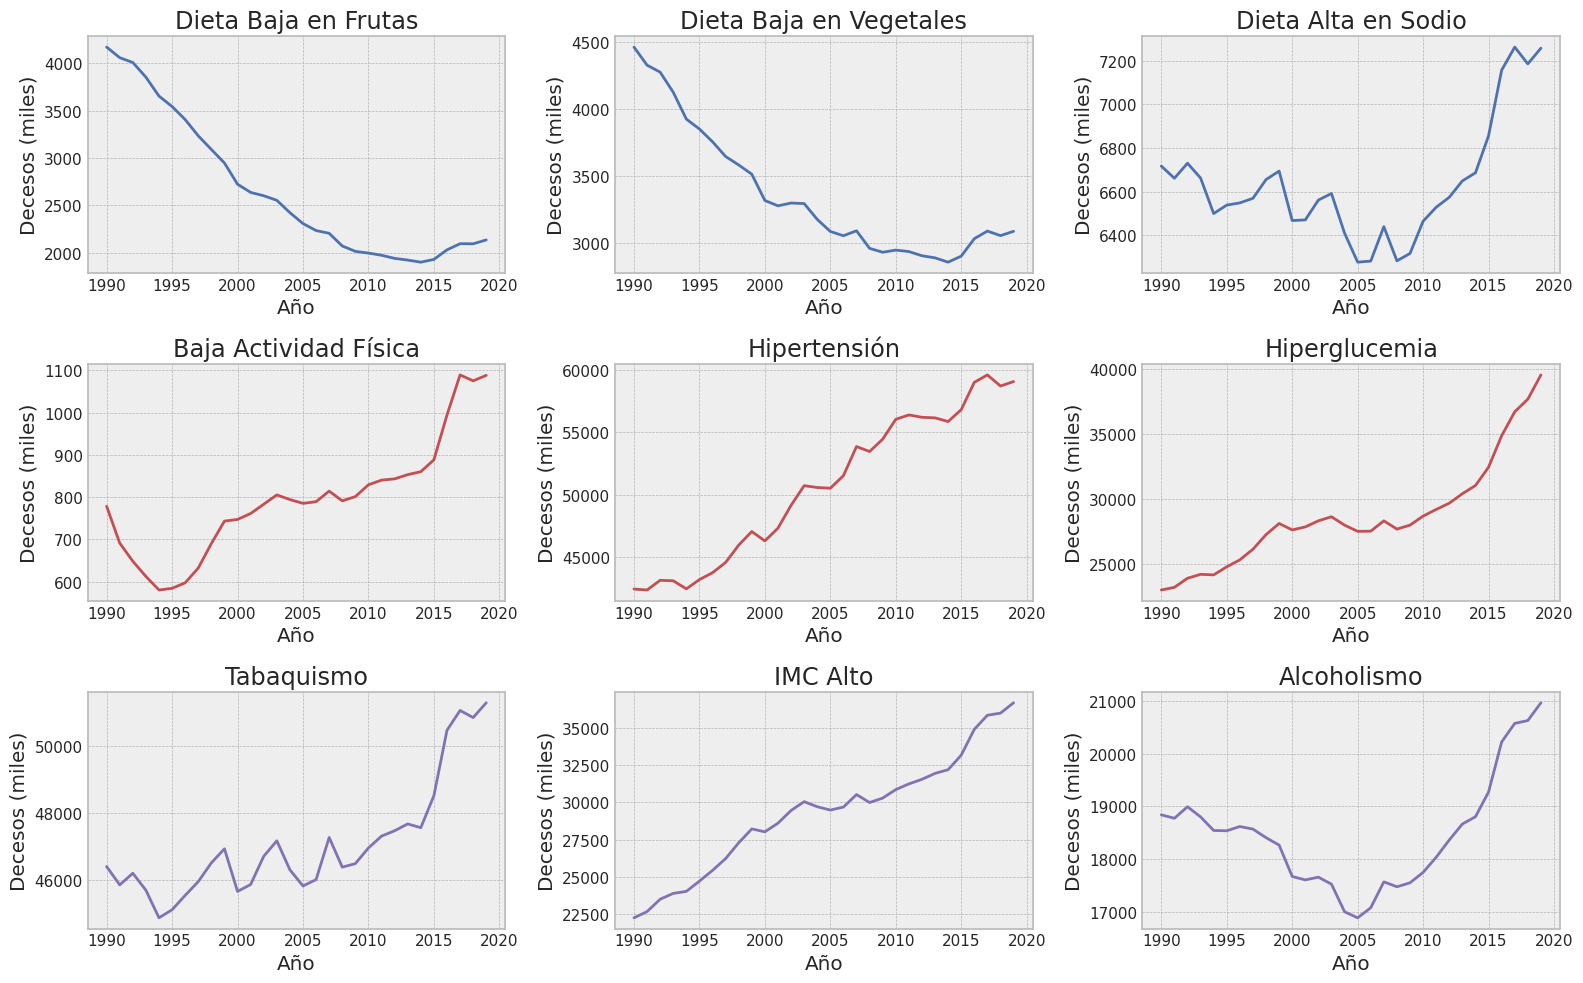

In [281]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#Se utiliza el estilo bmh
mpl.style.use('bmh')

# Se crea un marco con 3 filas y 3 columnas (9 gráficos)
fig, axs = plt.subplots(3, 3, figsize=(16, 10))

# Dieta Baja en Frutas
axs[0, 0].plot(x, arg_cor['DBF'], color='b')
axs[0, 0].set_title('Dieta Baja en Frutas')
axs[0, 0].set_xlabel('Año')
axs[0, 0].set_ylabel('Decesos (miles)')

# Dieta Baja en Vegetales
axs[0, 1].plot(x, arg_cor['DBV'], color='b')
axs[0, 1].set_title('Dieta Baja en Vegetales')
axs[0, 1].set_xlabel('Año')
axs[0, 1].set_ylabel('Decesos (miles)')

# Dieta Alta en Sodio
axs[0, 2].plot(x, arg_cor['DAS'], color='b')
axs[0, 2].set_title('Dieta Alta en Sodio')
axs[0, 2].set_xlabel('Año')
axs[0, 2].set_ylabel('Decesos (miles)')

# Poca Actividad Física
axs[1, 0].plot(x, arg_cor['BAF'], color='r')
axs[1, 0].set_title('Baja Actividad Física')
axs[1, 0].set_xlabel('Año')
axs[1, 0].set_ylabel('Decesos (miles)')

# Hipertensión
axs[1, 1].plot(x, arg_cor['HIP'], color='r')
axs[1, 1].set_title('Hipertensión')
axs[1, 1].set_xlabel('Año')
axs[1, 1].set_ylabel('Decesos (miles)')

# Glucemia Alta
axs[1, 2].plot(x, arg_cor['GLU'], color='r')
axs[1, 2].set_title('Hiperglucemia')
axs[1, 2].set_xlabel('Año')
axs[1, 2].set_ylabel('Decesos (miles)')

# Tabaquismo
axs[2, 0].plot(x, arg_cor['TAB'], color='m')
axs[2, 0].set_title('Tabaquismo')
axs[2, 0].set_xlabel('Año')
axs[2, 0].set_ylabel('Decesos (miles)')

# IMC Alto
axs[2, 1].plot(x, arg_cor['IMC'], color='m')
axs[2, 1].set_title('IMC Alto')
axs[2, 1].set_xlabel('Año')
axs[2, 1].set_ylabel('Decesos (miles)')

# Alcoholismo
axs[2, 2].plot(x, arg_cor['ALC'], color='m')
axs[2, 2].set_title('Alcoholismo')
axs[2, 2].set_xlabel('Año')
axs[2, 2].set_ylabel('Decesos (miles)')

# Se ajusta el espacio entre gráficos
fig.tight_layout()

# Se muestra
plt.show()

##Conclusiones de los gráficos:

**a) Dieta baja en frutas**: Se observa que desde el año 1990 hasta el año 2014 se registra una baja importante en la cantidad de decesos por este factor. El valor máximo se registra en 1990 con 4172 decesos y el mínimo en 2014 con 1899. A partir del año 2105 se registra un aumento de muertes debido a este factor.

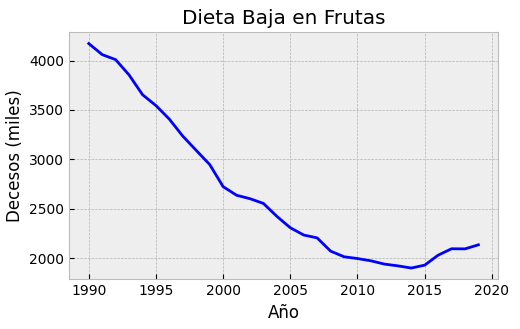

A pesar de este notorio descenso, todavía es un factor de riesgo a tener en cuenta dado que hasta el día de hoy, los argentinos no consumen la cantidad recomendada de frutas.

Fuente: https://www.redalyc.org/journal/3475/347566193006/html/


In [282]:
#Se puede observar los valores mínimos y máximos de cada factor
print(arg_cor['DBF'].max())

4172


In [283]:
arg_cor.loc[arg_cor['DBF']==4172]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
1990,4172,4459,6717,778,42440,23040,46415,22271,18840


In [284]:
print(arg_cor['DBF'].min())

1899


In [285]:
arg_cor.loc[arg_cor['DBF']==1899]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
2014,1899,2855,6686,860,55872,31043,47575,32192,18804


In [286]:
arg_cor['DBF'].mean()

2657.866666666667

El valor mínimo se registra en 2014 con 1899 casos y el máximo en 1990 con 4172 casos.

**b) Dieta baja en verduras**: La tendencia es muy parecida a la que se observa en con la fruta. Se registra un descenso desde el año 1990 hasta el 2014. Se registra un aumento a partir del año 2015.

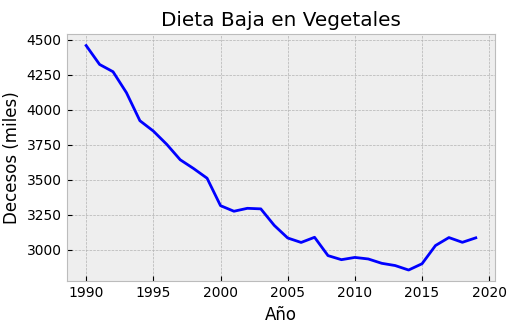

In [287]:
print(arg_cor['DBV'].max())

4459


In [288]:
arg_cor.loc[arg_cor['DBV']==4459]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
1990,4172,4459,6717,778,42440,23040,46415,22271,18840


In [289]:
print(arg_cor['DBV'].min())

2855


In [290]:
arg_cor.loc[arg_cor['DBV']==2855]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
2014,1899,2855,6686,860,55872,31043,47575,32192,18804


El valor mínimo se registra en 2014 con 2855 casos y el máximo en 1990 con 4459 casos.

Considerando los fallecimientos ocurridos por los factores del bajo consumo de frutas y verduras, se concluye que estos disminuyen a lo largo de los años. Esto se debe a que la población de Argentina comienza a consumir más frutas y verduras por los beneficios asociados a la salud, sumado a muchos otros factores como el precio de los demás alimentos, la posibilidad de adquirir productos de mejor calidad, etc.

Se realiza una correlación entre los dos factores para determinar si la disminución de los fallecimientos están relacionados entre sí. Es decir, si disminuyen en la misma proporción.

Se crea un nuevo dataset que incluya los dos factores de riesgo

In [291]:
correlacion_1 = arg_cor[['DBF','DBV']]
correlacion_1

,DBF,DBV
AÑO,,
1990,4172,4459
1991,4060,4324
1992,4009,4272
1993,3854,4122
1994,3654,3922
1995,3544,3848
1996,3406,3753
1997,3234,3643
1998,3090,3580


Se realiza la gráfica de correlación entre los dos factores. En el eje x se coloca el factor DBF (dieta baja en frutas) y en el eje y el factor DBV (dieta baja en verduras).

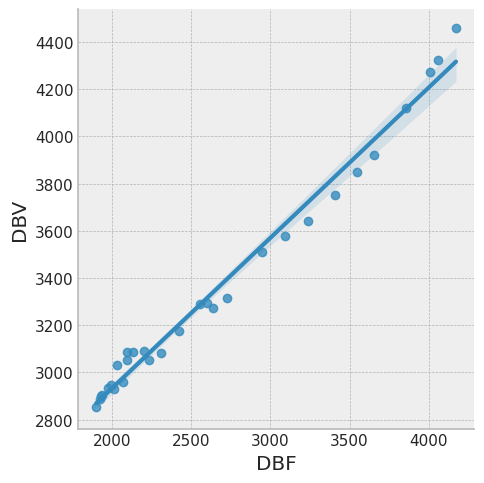

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.lmplot(x = "DBF", y = "DBV", data = correlacion_1);

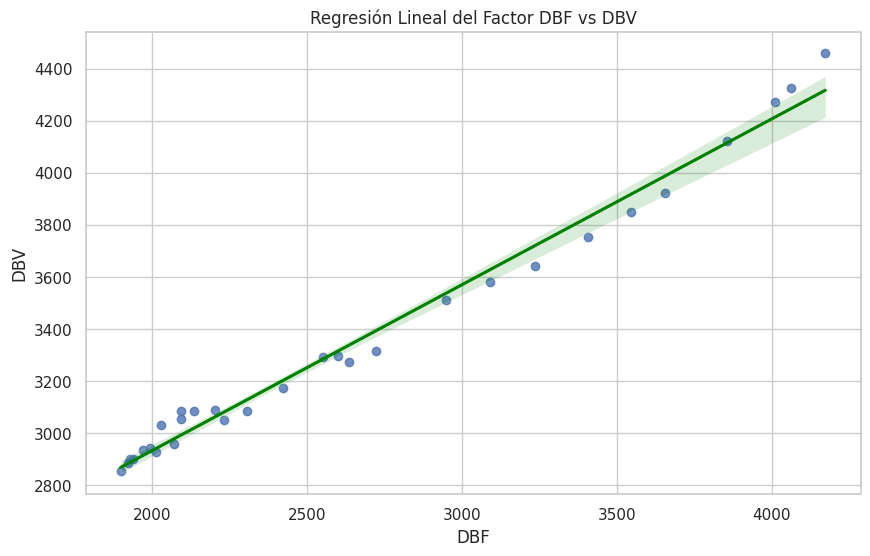

In [293]:
# Una versión más bonita
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.regplot(x="DBF", y="DBV", data=correlacion_1, line_kws={"color": "green"})
ax.set_title("Regresión Lineal del Factor DBF vs DBV")
ax.set_xlabel("DBF")
ax.set_ylabel("DBV")
plt.show()

Se determina una buena regresión lineal entre ambos factores, indicando que las defunciones disminuyen de manera proporcional año a año. Por lo tanto, los dos factores están relacionados y podrían considerarse como un solo factor.

Se decide obtener una expresión matemática que muestre la regresión y además, determinar el coeficiente de regresión para estudiar su valor y concluir si el modelo elegido es correcto.

In [294]:
from sklearn.linear_model import LinearRegression
X = correlacion_1["DBF"].values.reshape(-1, 1)
y = correlacion_1["DBV"].values
model = LinearRegression()
model.fit(X, y)
pendiente = model.coef_[0]
ordenada = model.intercept_
# Calculamos R^2
r2 = model.score(X, y)
# Formatear la ecuación de la regresión y el R^2
ecuacion = f"f(x)={pendiente:.2f}*x {ordenada:.2f}"
r2 = f"{r2:.2f}"

# Imprimir resultados
print ("La expresión matemática de la regresión lineal es",ecuacion, "y su parámetro R2 es",r2)

La expresión matemática de la regresión lineal es f(x)=0.64*x 1659.78 y su parámetro R2 es 0.99


El parámetro R^2 es muy cercano a 1 y eso indica que el ajuste es muy bueno. La pendiente no es 1 y se debe a que las cantidades de decesos ocurridos en los dos factores no son iguales. Los fallecimientos asociados a una baja dieta en verduras son mayores que los asociados a una baja dieta en frutas y esto ocurre año a año. Sin embargo, se demuestra de esta manera la relación directa entre los dos factores. Si los fallecimientos por uno de los factores disminuye, el otro factor también disminuye.

Modelo



**c) Dieta alta en sodio**:

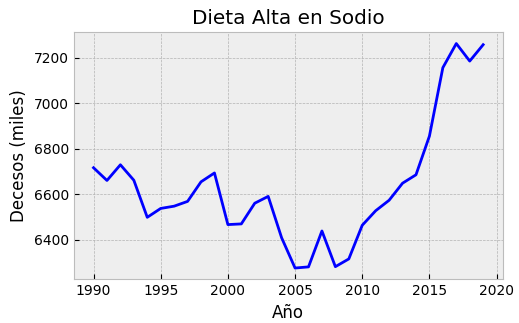

En el gráfico se observa un descenso entre los años 1990 y 1994. Durante los años 1995 a 1999 se observa un incremento en los decesos. Se mantiene durante el año 2000 a 2001 y sube hasta el 2003. Disminuye hasta el 2005 con un pico en el 2007 y a partir del año 2008 la cantidad de decesos aumenta notablemente hasta el año 2017.

Sería interesante relacionar este factor de riesgo con el factor de Hipertensión. Se sabe que están estrechamente relacionados y se podría determinar si existe alguna expresión matemática o modelo que las relacione.

In [295]:
print(arg_cor['DAS'].max())

7263


In [296]:
arg_cor.loc[arg_cor['DAS']==7263]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
2017,2094,3087,7263,1089,59610,36691,51077,35840,20571


In [297]:
print(arg_cor['DAS'].min())

6276


In [298]:
arg_cor.loc[arg_cor['DAS']==6276]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
2005,2307,3084,6276,785,50526,27533,45836,29490,16890


El valor mínimo se registra en 2005 con 6276 casos y el máximo en 2017 con 7263 casos.

**d) Baja actividad física**:

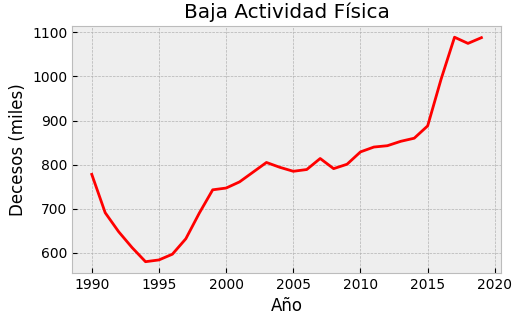

Se observa un descenso durante el período de 1990 - 1994 en los decesos. A partir del 1994 los decesos comienzan a aumentar.

In [299]:
print(arg_cor['BAF'].max())

1089


In [300]:
arg_cor.loc[arg_cor['BAF']==1089]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
2017,2094,3087,7263,1089,59610,36691,51077,35840,20571


In [301]:
print(arg_cor['BAF'].min())

580


In [302]:
arg_cor.loc[arg_cor['BAF']==580]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
1994,3654,3922,6499,580,42456,24199,44885,24043,18544


El valor mínimo se registra en 1994 con 580 casos y el máximo en 2017 con 1089 casos.

**e) Hipertensión**:

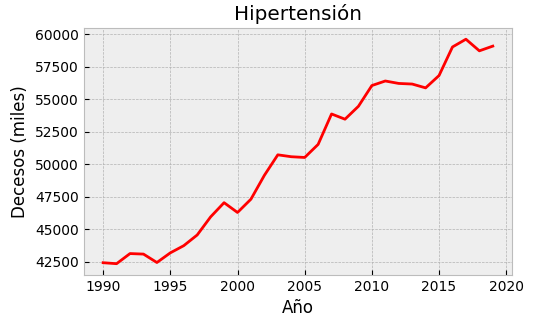

El gráfico habla por si solo, se observa un incremento en los fallecimientos debido a este factor de más de 15000 en los 29 años de registro de los datos.


In [303]:
print(arg_cor['HIP'].max())

59610


In [304]:
arg_cor.loc[arg_cor['HIP']==59610]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
2017,2094,3087,7263,1089,59610,36691,51077,35840,20571


In [305]:
print(arg_cor['HIP'].min())

42365


In [306]:
arg_cor.loc[arg_cor['HIP']==42365]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
1991,4060,4324,6661,691,42365,23242,45869,22689,18775


El valor mínimo se registra en 1991 con 42365 casos y el máximo en 2017 con 59610 casos. La diferencia entre el máximo y el mínimo es 17245 casos. Es decir, que en el intervalo de tiempo de 26 años, los decesos causados o asociados a la hipertensión aumentaron en un 40%.



Ahora surge una importante comparación: La dieta alta en sodio y la hipertensión. Se sabe que los dos están íntimamente relacionados ya que se asocia el abuso de la sal en las comidas con la hipertensión. Se elige graficar 3 regresiones, la primera que muestre la regresión del factor DAS con el tiempo, la segunda que muestre la regresión del factor HIP con el tiempo y finalmente, una regresión que relacione los dos factores.

Primero se muestran los valores de los dos factores de riesgo incluyendo el rango de años.

In [307]:
anio = pd.Series(arg_cor.index,index=arg_cor.index)
das = pd.Series(arg_cor['DAS'],index=arg_cor.index)
hip = pd.Series(arg_cor['HIP'], index=arg_cor.index)
das_hip= pd.DataFrame([anio,das, hip]).T
nuevo_indice = list(range(30))
das_hip.index = nuevo_indice
das_hip.head()


,AÑO,DAS,HIP
0,1990,6717,42440
1,1991,6661,42365
2,1992,6730,43143
3,1993,6662,43103
4,1994,6499,42456


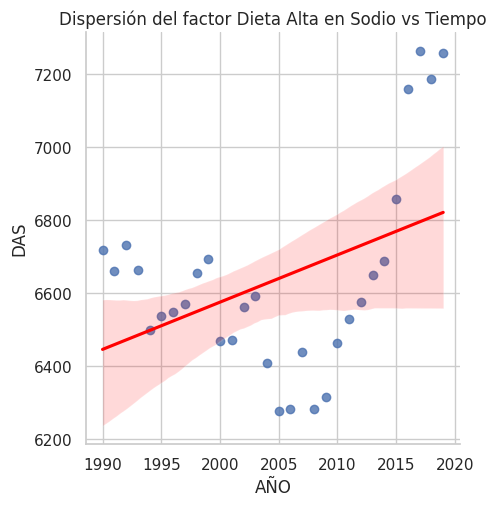

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
mpl.style.use ('fast')
sns.lmplot(x='AÑO', y='DAS', data=das_hip, line_kws={'color': 'red'})
plt.title('Dispersión del factor Dieta Alta en Sodio vs Tiempo')
plt.xlabel('AÑO')
plt.ylabel('DAS')
plt.show()

La dispersión no muestra un correcto ajuste lineal. Por como se observan los puntos se puede tratar con un ajuste cuadrático o polinómico de orden 3. Esto se determina usando planilla de cálculo y resulta

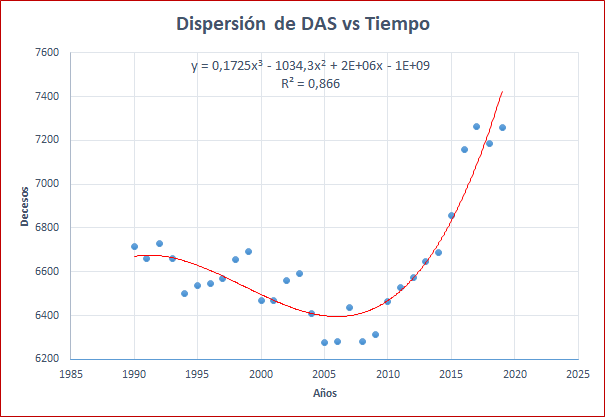

Con un poco de investigación se logra mostrar algo similar con matplotlib.

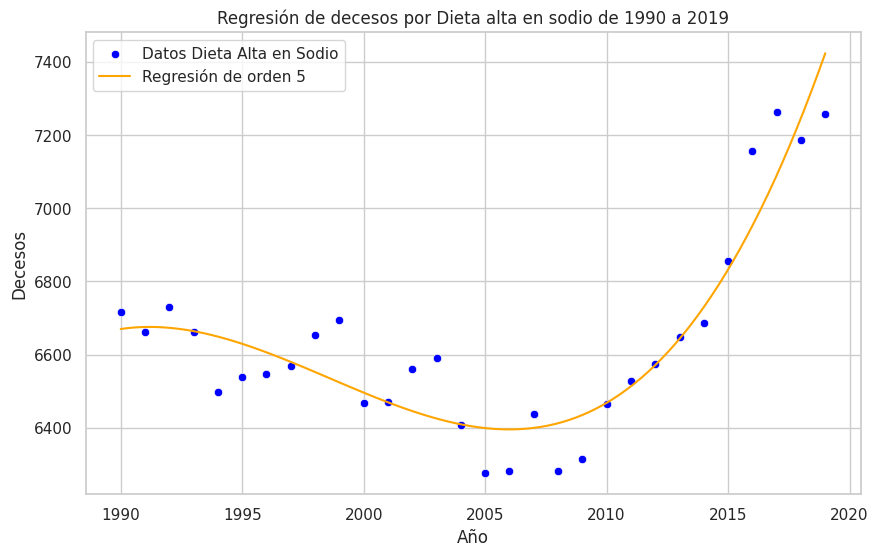

In [309]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Se copian los datos originales y se transforman en array
tiempo = np.array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
                 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
                 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
das = np.array([6717, 6661, 6730, 6662, 6499, 6538, 6548, 6569, 6655, 6694,
                6467, 6470, 6561, 6591, 6409, 6276, 6281, 6439, 6282, 6316,
                6464, 6528, 6574, 6649, 6686, 6856, 7157, 7263, 7186, 7258])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tiempo, y=das, color='blue', label='Datos Dieta Alta en Sodio')

# En esta parte se puede ajustar un polinomio en el orden que se desee
coeficientes = np.polyfit(tiempo,das, 3)  # Se ajusta con orden 3
polinomio = np.poly1d(coeficientes)

# Se ajustan los valores
tiempo_2 = np.linspace(tiempo.min(), tiempo.max(), 100)
decesos_2 = polinomio(tiempo_2)

# Dibujar la curva ajustada
plt.plot(tiempo_2, decesos_2, color='orange', label='Regresión de orden 5')

# Configuro el gráfico y lo muestro
plt.xlabel('Año')
plt.ylabel('Decesos')
plt.title('Regresión de decesos por Dieta alta en sodio de 1990 a 2019')
plt.legend()
plt.show()

Ahora, para analizar la dispersión de con ajuste lineal del factor de Hipertensión en función del tiempo se realiza lo siguiente:

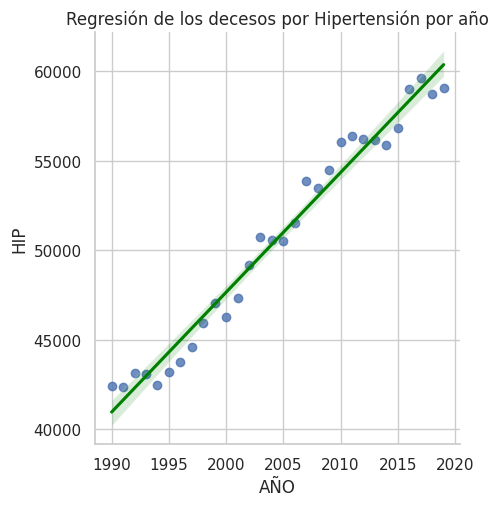

In [310]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='AÑO', y='HIP', data=das_hip, line_kws={'color': 'green'})
plt.title('Regresión de los decesos por Hipertensión por año')
plt.xlabel('AÑO')
plt.ylabel('HIP')
plt.show()

En este caso, se observa un buen ajuste lineal de los datos. Se puede determinar la ecuación de la recta y su parámetro R^2

In [311]:
# Se analiza si dicha regresión tiene un adecuado coeficiente de regresión
from sklearn.linear_model import LinearRegression
X = das_hip["AÑO"].values.reshape(-1, 1)  # AÑO como característica (X)
y = das_hip["HIP"].values  # TOTAL como variable objetivo (y)
model = LinearRegression()
model.fit(X, y)
pendiente = model.coef_[0]
ordenada = model.intercept_
# Calculamos R^2
r2 = model.score(X, y)
# Formatear la ecuación de la regresión y el R^2
ecuacion = f"f(x)={pendiente:.2f}*x {ordenada:.2f}"
r2 = f"{r2:.2f}"

# Imprimir resultados
print ("La expresión matemática de la regresión lineal es",ecuacion, "y su parámetro R2 es",r2)

La expresión matemática de la regresión lineal es f(x)=668.95*x -1290253.10 y su parámetro R2 es 0.97


EL ajuste lineal es muy bueno ya que el coeficiente R^2 es muy cercano a 1. La pendiente positiva indica que los fallecimientos aumentan de manera proporcional por año.

Finalmente, se muestra la regresión comparando los dos factores DAS e HIP

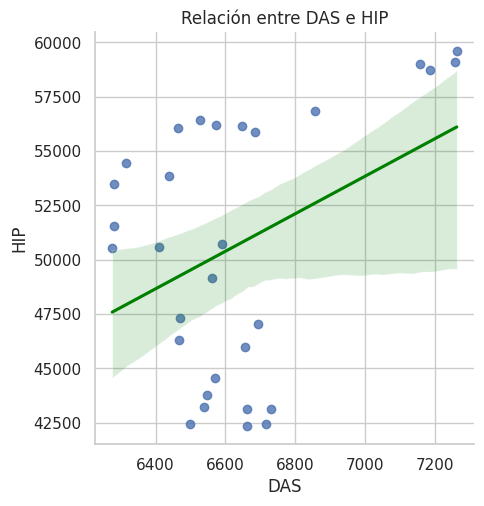

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='DAS', y='HIP', data=das_hip, line_kws={'color': 'green'})
plt.title('Relación entre DAS e HIP')
plt.xlabel('DAS')
plt.ylabel('HIP')
plt.show()

Tampoco se observa ningún buen ajuste lineal al comparar los datos de los dos factores.

**f) Hiperglucemia**:

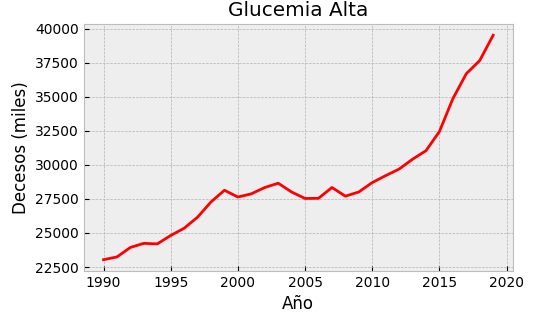

El gráfico muestra un ligero aumento desde 1990 hasta 1999. A partir del año 2000 hasta el 2008 se registran ligeras variaciones en los decesos para aumentar bruscamente hasta el 2019.

In [313]:
print(arg_cor['GLU'].max())

39517


In [314]:
arg_cor.loc[arg_cor['GLU']==39517]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
2019,2134,3085,7258,1088,59080,39517,51306,36676,20962


In [315]:
print(arg_cor['GLU'].min())

23040


In [316]:
arg_cor.loc[arg_cor['GLU']==23040]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
1990,4172,4459,6717,778,42440,23040,46415,22271,18840


El valor mínimo se registra en 1990 con 23040 casos y el máximo en 2019 con 39517 casos.

**g) Tabaquismo**:

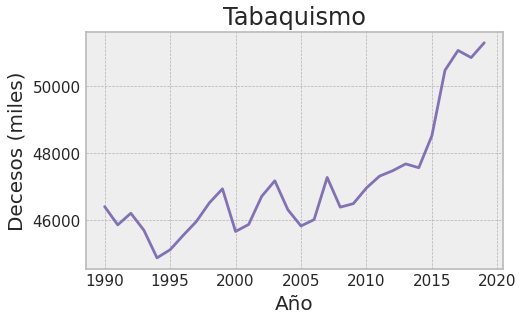

El gráfico muestra variaciones bastante marcadas desde 1990 a 2009 con años donde los fallecimientos disminuyen y aumentan. De 1990 a 1994 los decesos disminuyen para aumentar hasta el 1999. Del año 2000 hasta el 2009 se registra un aumento general con variaciones escalonadas positivas y negativas. A partir del año 2009 el aumento es brusco y muy marcado. Personalmente, esto llama la antención porque se conocen en profundidad los efectos nocivos que produce el cigarrillo y existen campañas de difusión que parecen no surtir efecto.

Es cierto que la población Argentina va en aumento pero es cierto que son cada vez más los jóvenes que comienzan a fumar.



In [317]:
print(arg_cor['TAB'].max())

51306


In [318]:
arg_cor.loc[arg_cor['TAB']==51306]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
2019,2134,3085,7258,1088,59080,39517,51306,36676,20962


In [319]:
print(arg_cor['TAB'].min())

44885


In [320]:
arg_cor.loc[arg_cor['TAB']==44885]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
1994,3654,3922,6499,580,42456,24199,44885,24043,18544


El valor mínimo se registra en 1994 con 44885 casos y el máximo en 2019 con 51306 casos.

**h) IMC alto (se asocia a la obesidad)**:

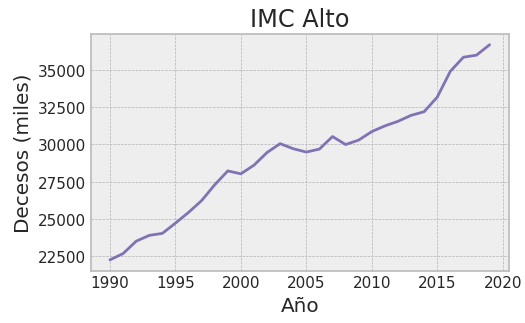


In [321]:
print(arg_cor['IMC'].max())

36676


In [322]:
arg_cor.loc[arg_cor['IMC']==36676]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
2019,2134,3085,7258,1088,59080,39517,51306,36676,20962


In [323]:
print(arg_cor['IMC'].min())

22271


In [324]:
arg_cor.loc[arg_cor['IMC']==22271]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
1990,4172,4459,6717,778,42440,23040,46415,22271,18840


El valor mínimo se registra en 1990 con 22271 casos y el máximo en 2019 con 36676 casos. Se decide estudiar la regresión del IMC respecto al tiempo ya que se observa una tendencia lineal.

Se toman todos los datos de imc y se transforman en un dataset de nombre imc.

In [325]:
anio = pd.Series(arg_cor.index,index=arg_cor.index)
imc_1 = pd.Series(arg_cor['IMC'],index=arg_cor.index)
imc= pd.DataFrame([anio,imc_1]).T
nuevo_indice = list(range(30))
imc.index = nuevo_indice
imc.head()

,AÑO,IMC
0,1990,22271
1,1991,22689
2,1992,23518
3,1993,23909
4,1994,24043


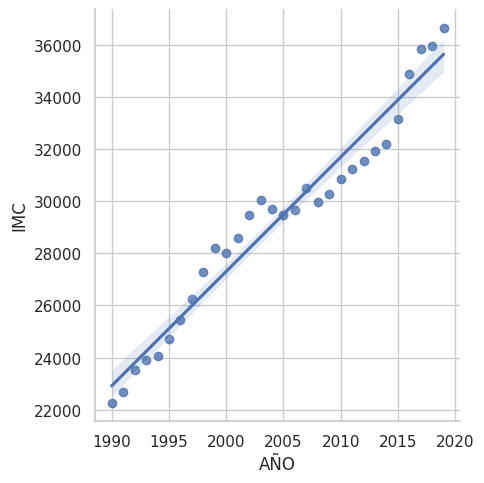

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.lmplot(x = "AÑO", y = "IMC", data = imc);

Se observa una buena regresión lineal, por lo tanto, se determina su ecuación y su coeficiente de regresión R^2.

In [327]:
# Se analiza si dicha regresión tiene un adecuado coeficiente de regresión
from sklearn.linear_model import LinearRegression
X = imc["AÑO"].values.reshape(-1, 1)
y = imc["IMC"].values
model = LinearRegression()
model.fit(X, y)
pendiente = model.coef_[0]
ordenada = model.intercept_
# Calculamos R^2
r2 = model.score(X, y)
# Formatear la ecuación de la regresión y el R^2
ecuacion = f"f(x)={pendiente:.2f}*x {ordenada:.2f}"
r2 = f"{r2:.2f}"

# Imprimir resultados
print ("La expresión matemática de la regresión lineal es",ecuacion, "y su parámetro R2 es",r2)

La expresión matemática de la regresión lineal es f(x)=439.43*x -851545.59 y su parámetro R2 es 0.96


El ajuste lineal realizado tiene un R^2 adecuado y puede considerarse un modelo matemático lineal para estudiar el aumento de los decesos en función del tiempo.

**i) Alcoholismo**:

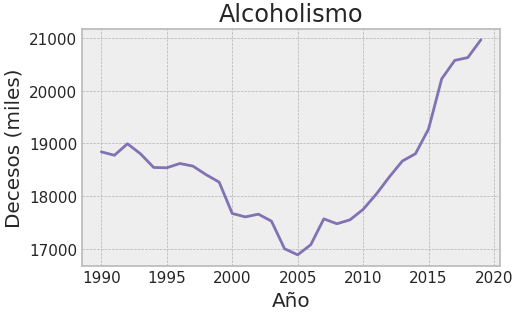

Se observa un descenso desde al año 1990 hasta el año 2005. A partir del siguiente año comienza a subir notoriamente hasta alcanzar un máximo. Luego de varios intentos se decide tomar los datos y transformarlos en un array para poder estudiar que tipo de regresión se observa.

Al principio se piensa que puede ser cuadrática, pero se escapan muchos puntos y se comienza a probar con diferentes órdenes de polinomios. El que mejor se ajusta es de orden 5.

In [328]:
arg_cor['ALC']

AÑO
1990    18840
1991    18775
1992    18993
1993    18801
1994    18544
1995    18538
1996    18619
1997    18570
1998    18408
1999    18267
2000    17673
2001    17608
2002    17660
2003    17527
2004    17005
2005    16890
2006    17081
2007    17571
2008    17478
2009    17553
2010    17750
2011    18037
2012    18364
2013    18666
2014    18804
2015    19272
2016    20220
2017    20571
2018    20625
2019    20962
Name: ALC, dtype: int64

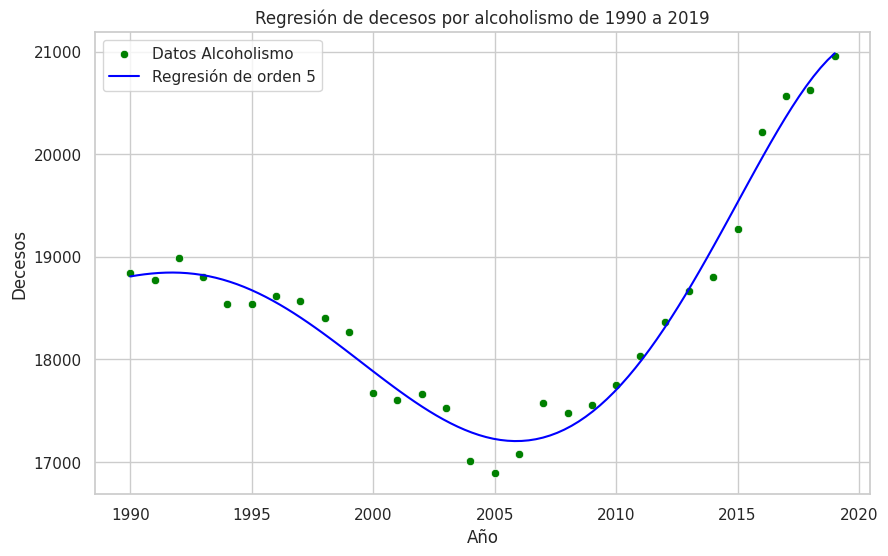

In [329]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Se copian los datos originales y se transforman en array
tiempo = np.array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
                 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
                 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
decesos = np.array([18840, 18775, 18993, 18801, 18544, 18538, 18619, 18570,
                    18408, 18267, 17673, 17608, 17660, 17527, 17005, 16890,
                    17081, 17571, 17478, 17553, 17750, 18037, 18364, 18666,
                    18804, 19272, 20220, 20571, 20625, 20962])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tiempo, y=decesos, color='green', label='Datos Alcoholismo')

# En esta parte se puede ajustar un polinomio en el orden que se desee
coeficientes = np.polyfit(tiempo,decesos, 5)  # Se ajusta con orden 5
polinomio = np.poly1d(coeficientes)

# Se ajustan los valores
tiempo_2 = np.linspace(tiempo.min(), tiempo.max(), 100)
decesos_2 = polinomio(tiempo_2)

# Dibujar la curva ajustada
plt.plot(tiempo_2, decesos_2, color='blue', label='Regresión de orden 5')

# Configuro el gráfico y lo muestro
plt.xlabel('Año')
plt.ylabel('Decesos')
plt.title('Regresión de decesos por alcoholismo de 1990 a 2019')
plt.legend()
plt.show()


In [330]:
print(arg_cor['ALC'].max())

20962


In [331]:
arg_cor.loc[arg_cor['ALC']==20962]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
2019,2134,3085,7258,1088,59080,39517,51306,36676,20962


In [332]:
print(arg_cor['ALC'].min())

16890


In [333]:
arg_cor.loc[arg_cor['ALC']==16890]

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
2005,2307,3084,6276,785,50526,27533,45836,29490,16890


El valor mínimo se registra en 2005 con 16890 casos y el máximo en 2019 con 20962 casos.

Luego de analizar los factores por separado, se deben analizar todos los factores juntos para tener una idea de cuales inciden en mayor proporción en las enfermedades cardiovasculares. Se grafican todos en un solo marco como se muestra a continuación.

In [334]:
x = arg_cor.index
x

Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019],
      dtype='int64', name='AÑO')

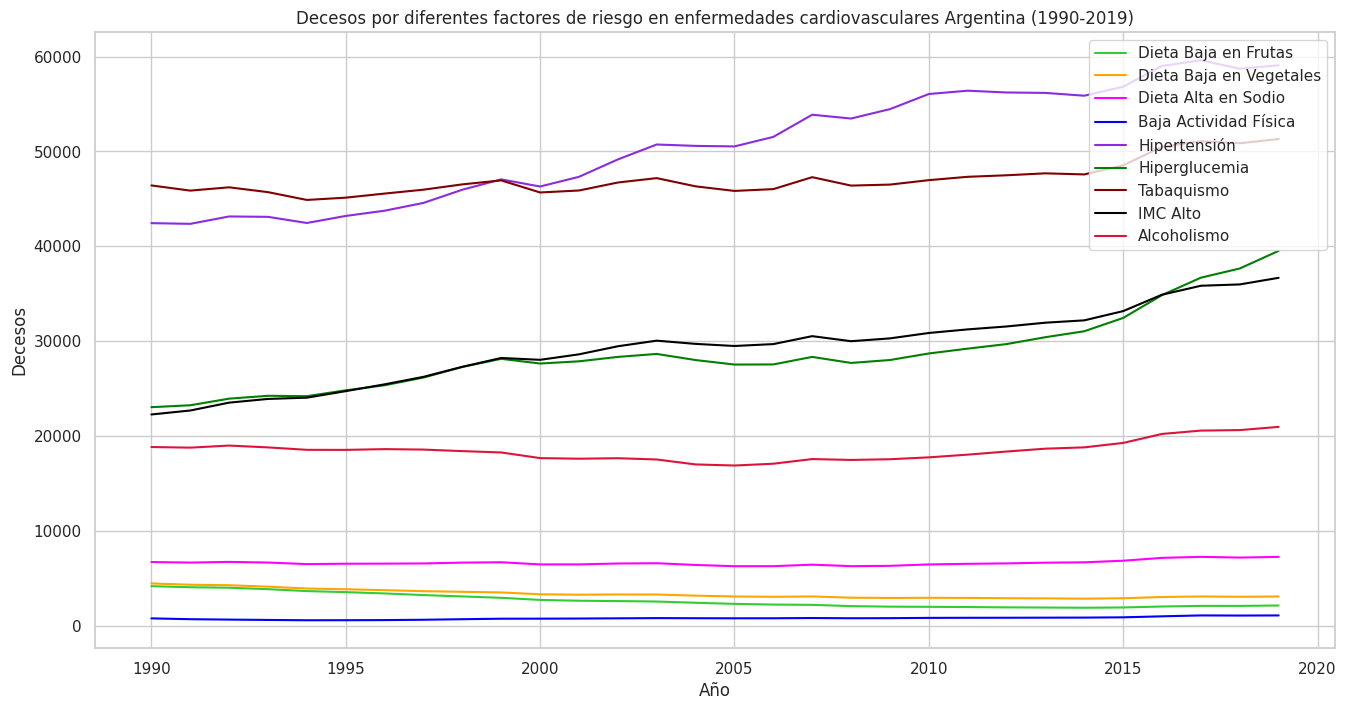

In [335]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use ('fast')
fig, ax = plt.subplots(figsize=(16, 8))

# Se grafican todos los factores en el mismo gráfico
ax.plot(x, arg_cor['DBF'], color='limegreen', label='Dieta Baja en Frutas')
ax.plot(x, arg_cor['DBV'], color='orange', label='Dieta Baja en Vegetales')
ax.plot(x, arg_cor['DAS'], color='magenta', label='Dieta Alta en Sodio')
ax.plot(x, arg_cor['BAF'], color='blue', label='Baja Actividad Física')
ax.plot(x, arg_cor['HIP'], color='blueviolet', label='Hipertensión')
ax.plot(x, arg_cor['GLU'], color='green', label='Hiperglucemia')
ax.plot(x, arg_cor['TAB'], color='maroon', label='Tabaquismo')
ax.plot(x, arg_cor['IMC'], color='black', label='IMC Alto')
ax.plot(x, arg_cor['ALC'], color='crimson', label='Alcoholismo')

# Se añade título, etiquetas y personalizaciones
ax.set_title('Decesos por diferentes factores de riesgo en enfermedades cardiovasculares Argentina (1990-2019)')
ax.set_xlabel('Año')
ax.set_ylabel('Decesos')
ax.set_facecolor('white')
ax.legend()
plt.show()

Si se observa el gráfico se puede ordenar la incidencia de cada factor de mayor a menor:

1 - Hipertensión (hasta el año 1999 era el segundo factor incidente, a partir del año 2000 se convierte en el principal).

2 - Tabaquismo (hasta el año 1999 era el principal factor de riesgo y a partir del año 2000 pasa a segundo lugar).

3 - IMC Alto (hasta el año 1999 se ubicaba cuarto y a partir del año 2000 pasa a tercer lugar).

4 - Hiperglucemia.

5 - Alcoholismo.

6 - Dieta alta en sodio.

7 - Dieta baja en vegetales.

8 - Dieta baja en frutas.

9 - Baja actividad física.

Ahora se procede a sumar los decesos debidos a los 9 factores por año para graficarlos. Además, se restan del total de decesos por año para conocer los valores debido a otras enfermedades.

In [336]:
# Decesos por los 9 factores estudiados
enf_coronarias = arg_cor.sum(axis=1)
enf_coronarias

AÑO
1990    169132
1991    168676
1992    171469
1993    171010
1994    168782
1995    170922
1996    173026
1997    175587
1998    179489
1999    182522
2000    178570
2001    180436
2002    184576
2003    187387
2004    184427
2005    182727
2006    184227
2007    190136
2008    187141
2009    188875
2010    192567
2011    194487
2012    195561
2013    197194
2014    197786
2015    202809
2016    212681
2017    217322
2018    217253
2019    221106
dtype: int64

In [337]:
# Decesos por otras enfermedades
otras_enfermedades = argentina.sum(axis=1)-enf_coronarias
otras_enfermedades

AÑO
1990    74965
1991    73907
1992    73569
1993    72076
1994    70173
1995    70375
1996    70414
1997    70221
1998    70622
1999    70058
2000    67092
2001    66537
2002    67266
2003    67253
2004    64689
2005    62664
2006    62474
2007    64306
2008    62873
2009    63090
2010    64122
2011    64778
2012    65198
2013    65950
2014    66198
2015    67173
2016    68953
2017    68220
2018    67450
2019    67877
dtype: int64

In [338]:
# Creamos un nuevo dataset
data = {'AÑO': arg_cor.index,
        'CORONARIAS': enf_coronarias,
        'OTRAS': otras_enfermedades}
total = pd.DataFrame(data)
nuevo_indice = list(range(30))
total.index = nuevo_indice
total.head()

,AÑO,CORONARIAS,OTRAS
0,1990,169132,74965
1,1991,168676,73907
2,1992,171469,73569
3,1993,171010,72076
4,1994,168782,70173


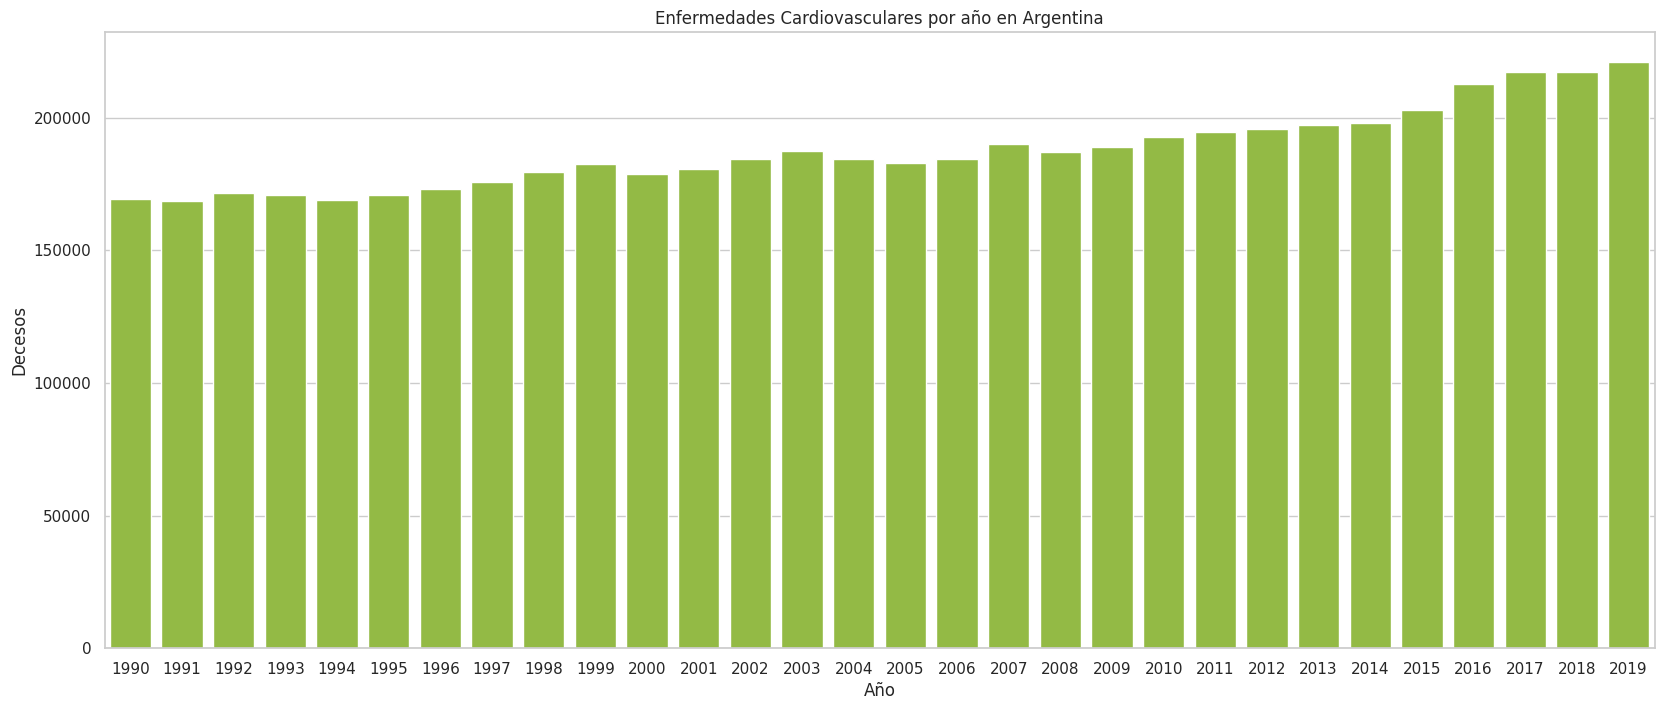

In [339]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
sns.barplot(data=total, x='AÑO', y='CORONARIAS', color='yellowgreen')
plt.xlabel('Año')
plt.ylabel('Decesos')
plt.title('Enfermedades Cardiovasculares por año en Argentina')
plt.show()


Se observa que la tendencia de las enfermedades cardiovasculares aumenta desde 1990 a 2019 con pequeñas disminuciones. A partir del año 2016 se nota un aumento en los decesos por este tipo de enfermedad.

Ahora se muestra un gráfico de barras donde se las enfermedades coronarias y otras se apilan por año para ver su incidencia o proporción.

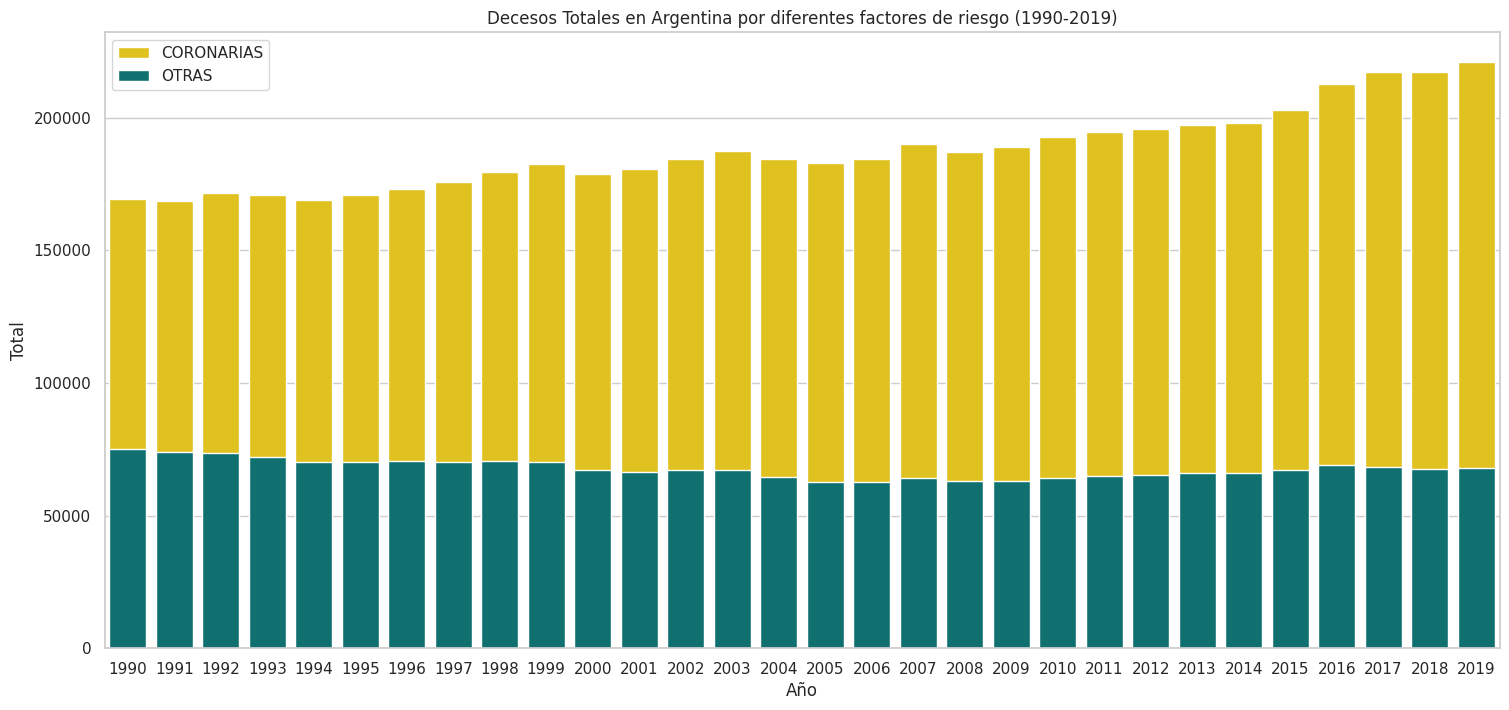

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 8))
s1=sns.barplot(data=total, x='AÑO', y='CORONARIAS', color='gold',label='CORONARIAS')
s2=sns.barplot(data=total, x='AÑO', y='OTRAS', color='teal',label='OTRAS')
plt.xlabel('Año')
plt.ylabel('Total')
plt.title('Decesos Totales en Argentina por diferentes factores de riesgo (1990-2019)')
ax.legend()
plt.show()

La incidencia de las enfermedades coronarias o cardiovasculares por año es mayoritaria, llegando a ser del 70% aproximadamente. Estos resultados parecen indicar que no se tomaron bien los factores de riesgo, ya que, la incidencia de fallecimientos por enfermedades de este tipo ronda el 35% según datos oficiales.

Se suman los decesos de cada clasificación de enfermedad y se muestran por un gráfico de torta.

In [341]:
total['CORONARIAS'].sum()

5627883

In [342]:
total['OTRAS'].sum()

2030543

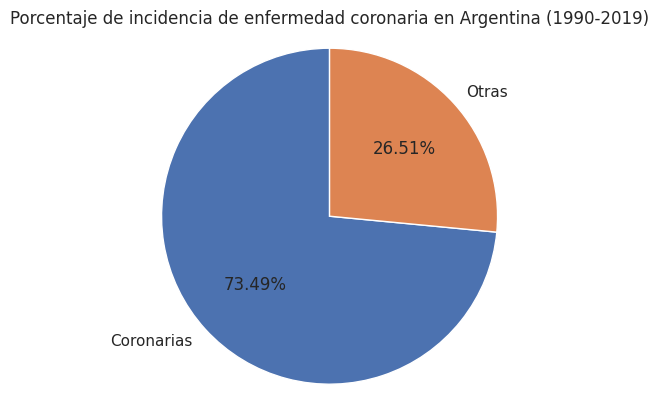

In [343]:
import matplotlib.pyplot as plt

valores = [5627883, 2030543]
etiquetas = ['Coronarias', 'Otras']
fig, ax = plt.subplots()
ax.pie(valores, labels=etiquetas, autopct='%1.2f%%', startangle=90)
ax.axis('equal')
ax.set_title('Porcentaje de incidencia de enfermedad coronaria en Argentina (1990-2019)')
plt.show()


Se concluye que en promedio, desde el año 1990 a 2019, el porcentaje de los fallecimientos en la Argentina debido a enfermedades coronarias supera el 70%. Esto fortalece la conclusión anterior de que se tomaron demasiados factores de riesgo para asociarlos a las enfermedades cardiovasculares.

Se decide tomar entonces los dos primeros factores de riesgo principales que son la Hipertensión y el Tabaquismo. Se procede a crear nuevos dataset, sumar sus valores por año y mostrarlos en un gráfico de torta.

In [344]:
nuevo = argentina[['HIP','TAB']]
nuevo.head()



,HIP,TAB
AÑO,,
1990,42440,46415
1991,42365,45869
1992,43143,46216
1993,43103,45708
1994,42456,44885


In [345]:
corazon = nuevo.sum(axis=1)
corazon.head()

AÑO
1990    88855
1991    88234
1992    89359
1993    88811
1994    87341
dtype: int64

In [346]:
otras_e = argentina.sum(axis=1)-corazon
otras_e.head()

AÑO
1990    155242
1991    154349
1992    155679
1993    154275
1994    151614
dtype: int64

In [347]:
dat =  {'AÑO': corazon.index,
        'CORONARIAS': corazon,
        'OTRAS': otras_e}
total_a = pd.DataFrame(dat)
nuevo_indice = list(range(30))
total_a.index = nuevo_indice
total_a.head()

,AÑO,CORONARIAS,OTRAS
0,1990,88855,155242
1,1991,88234,154349
2,1992,89359,155679
3,1993,88811,154275
4,1994,87341,151614


In [348]:
total_a['CORONARIAS'].sum()

2932270

In [349]:
total_a['OTRAS'].sum()

4726156

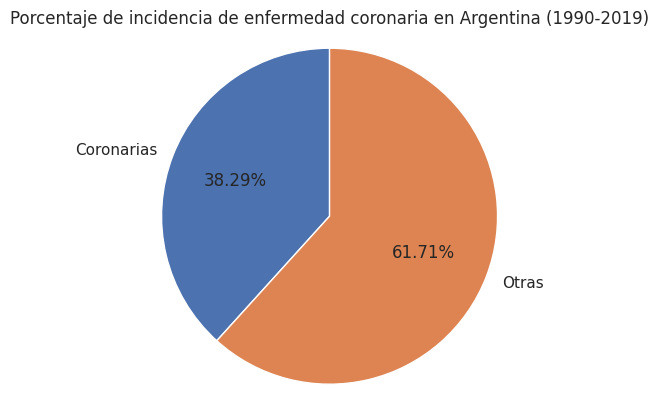

In [350]:
import matplotlib.pyplot as plt
valores = [2932270, 4726156]
etiquetas = ['Coronarias', 'Otras']
fig, ax = plt.subplots()
ax.pie(valores, labels=etiquetas, autopct='%1.2f%%', startangle=90)
ax.axis('equal')
ax.set_title('Porcentaje de incidencia de enfermedad coronaria en Argentina (1990-2019)')
plt.show()

Este nuevo resultado tiene más sentido ya que se trata de un poco más del 35% de incidencia de muerte por enfermedades coronarias. En vez de 9 factores de riesgo, se tomaron solo dos, que además, son muy importantes y representativos.

#Parte 6: Análisis Estadístico



Se realiza a continuación un análisis estadístico de los datos, tomando en primer lugar los totales referidos a los 9 factores de riesgo que representaban más del 75% de los fallecimientos en el período de tiempo estudiado.

Luego, se realiza lo mismo con los nuevos totales teniendo en cuenta dos factores (HIP y TAB).

Finalmente, se determinan las variables de tendencia central como la media, mediana y moda.

1) Primero para los totales de fallecimientos teniendo en cuenta que la enfermedad coronaria está dada por 9 factores.

In [351]:
total.head()

,AÑO,CORONARIAS,OTRAS
0,1990,169132,74965
1,1991,168676,73907
2,1992,171469,73569
3,1993,171010,72076
4,1994,168782,70173


In [352]:
total_a.head()

,AÑO,CORONARIAS,OTRAS
0,1990,88855,155242
1,1991,88234,154349
2,1992,89359,155679
3,1993,88811,154275
4,1994,87341,151614


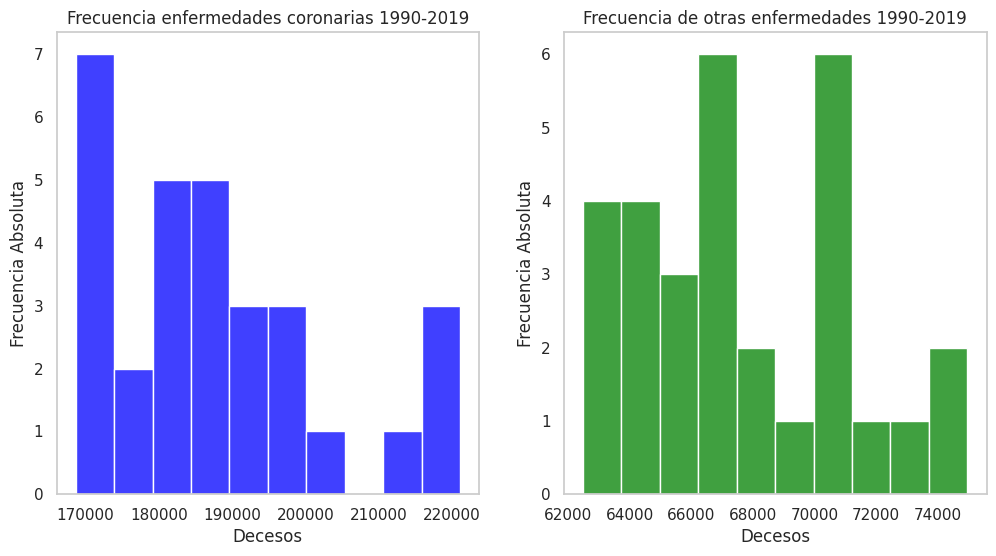

In [353]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=total, x= 'CORONARIAS',bins=10,color='blue',ax=axs[0])
axs[0].set_title("Frecuencia enfermedades coronarias 1990-2019")
axs[0].set_xlabel("Decesos")
axs[0].set_ylabel("Frecuencia Absoluta")
axs[0].grid(False)
sns.histplot(data=total, x= 'OTRAS',bins=10,color='green',ax=axs[1])
axs[1].set_title("Frecuencia de otras enfermedades 1990-2019")
axs[1].set_xlabel("Decesos")
axs[1].set_ylabel("Frecuencia Absoluta")
axs[1].grid(False)
plt.show()

Para las enfermedades coronarias

In [354]:
media = total['CORONARIAS'].mean()
mediana = total['CORONARIAS'].median()
moda = total['CORONARIAS'].mode()[0]
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Media: 187596.1
Mediana: 184501.5
Moda: 168676


Para las otras enfermedades

In [355]:
media = total['OTRAS'].mean()
mediana = total['OTRAS'].median()
moda = total['OTRAS'].mode()[0]
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Media: 67684.76666666666
Mediana: 67259.5
Moda: 62474


Generando los diagramas de caja se puede determinar si existen datos anómalos o outliers. Se hace para las dos columnas: CORONARIAS y OTRAS.

In [356]:
l=[x for x in total.columns if x not in ['AÑO']]
total_1= total[l]
total_1.head()

,CORONARIAS,OTRAS
0,169132,74965
1,168676,73907
2,171469,73569
3,171010,72076
4,168782,70173


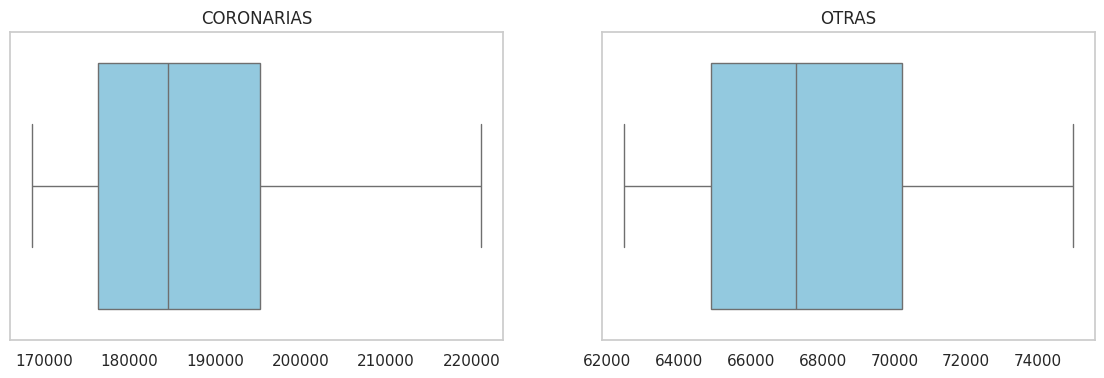

In [357]:
plt.figure(figsize=(14,4))
for i,j in zip(range(2),total_1.columns):
  plt.subplot(1,2,i+1)
  sns.boxplot(x=total_1[j],color ='skyblue')
  plt.title(j)
  plt.grid(False)
  plt.xlabel('')

No se observan outliers

2) Se grafican las distribuciones para enfermedades coronarias y otras teniendo en cuenta solo los dos factores.

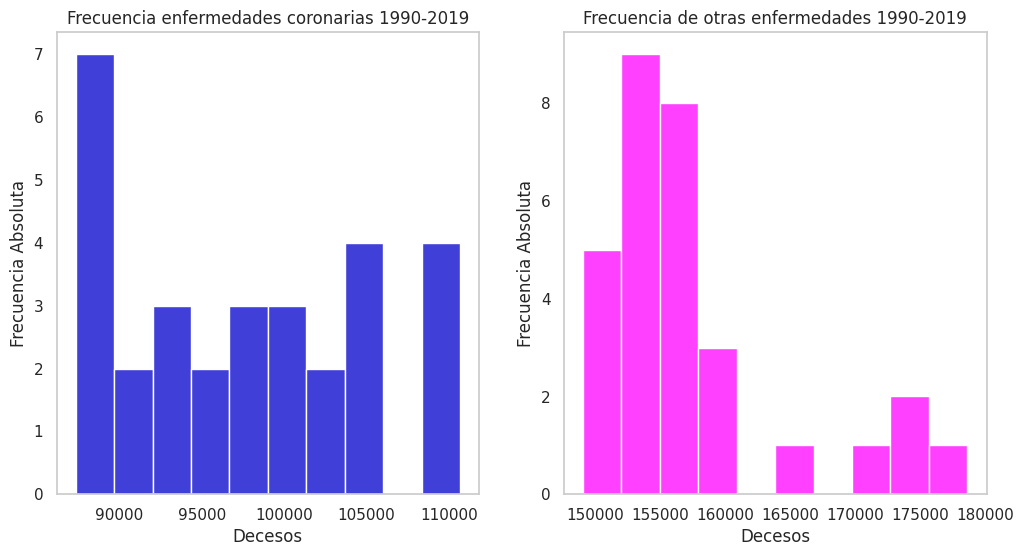

In [358]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=total_a, x= 'CORONARIAS',bins=10,color='mediumblue',ax=axs[0])
axs[0].set_title("Frecuencia enfermedades coronarias 1990-2019")
axs[0].set_xlabel("Decesos")
axs[0].set_ylabel("Frecuencia Absoluta")
axs[0].grid(False)
sns.histplot(data=total_a, x= 'OTRAS',bins=10,color='fuchsia',ax=axs[1])
axs[1].set_title("Frecuencia de otras enfermedades 1990-2019")
axs[1].set_xlabel("Decesos")
axs[1].set_ylabel("Frecuencia Absoluta")
axs[1].grid(False)
plt.show()

In [359]:
media = total_a['CORONARIAS'].mean()
mediana = total_a['CORONARIAS'].median()
moda = total_a['CORONARIAS'].mode()[0]
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Media: 97742.33333333333
Mediana: 97229.0
Moda: 87341


Se grafican los boxplot para encontrar outliers.

In [360]:
l=[x for x in total_a.columns if x not in ['AÑO']]
total_2= total_a[l]
total_2.head()

,CORONARIAS,OTRAS
0,88855,155242
1,88234,154349
2,89359,155679
3,88811,154275
4,87341,151614


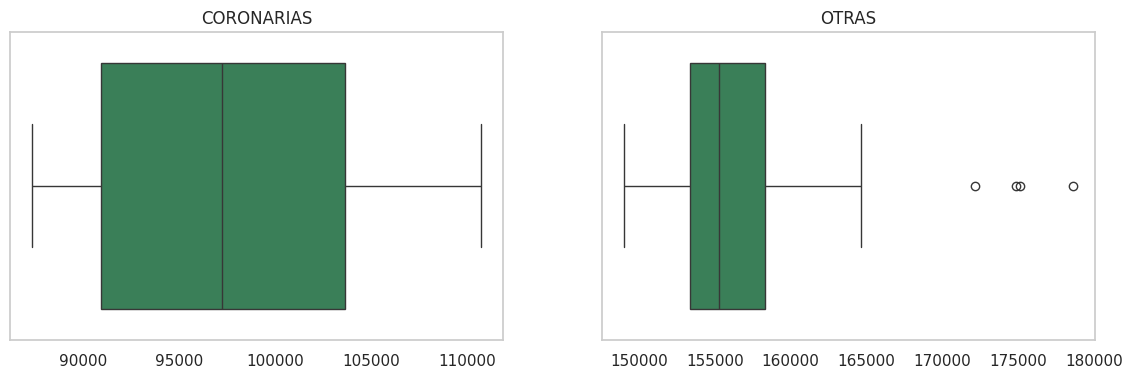

In [361]:
plt.figure(figsize=(14,4))
for i,j in zip(range(2),total_2.columns):
  plt.subplot(1,2,i+1)
  sns.boxplot(x=total_2[j],color ='seagreen')
  plt.title(j)
  plt.grid(False)
  plt.xlabel('')

Se observan 4 outliers en la columna asociada a OTRAS enfermedades. Se analizan por el método de IQR

In [362]:
Q1 = total_2['OTRAS'].quantile(0.25)
Q3 = total_2['OTRAS'].quantile(0.75)
IQR = Q3-Q1
Mediana = total_2['OTRAS'].median()
minimo = total_2['OTRAS'].min()
maximo = total_2['OTRAS'].max()
print ("Primer Cuartil",Q1)
print ("Tercer Cuartil",Q3)
print ("Rango Intercuartil",IQR)
print ("Valor Mínimo",minimo)
print ("Valor Máximo",maximo)

Primer Cuartil 153383.5
Tercer Cuartil 158342.75
Rango Intercuartil 4959.25
Valor Mínimo 149029
Valor Máximo 178597


In [363]:
#Bigotes
B1 = (Q1-1.5*IQR)
B2 = (Q3+1.5*IQR)
print ("Bigote inferior",B1)
print ("Bigote superior",B2)

Bigote inferior 145944.625
Bigote superior 165781.625


In [364]:
#Ubicación de los outliers
outliers_otras = (total_2['OTRAS']<B1) | (total_2['OTRAS']>B2)
outliers_otras

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
27     True
28     True
29     True
Name: OTRAS, dtype: bool

In [365]:
total_outliers_otras = total_2[outliers_otras]
print ("La cantidad de outliers son",len(total_outliers_otras))

La cantidad de outliers son 4


In [366]:
total_outliers_otras['OTRAS']

26    172136
27    174855
28    175122
29    178597
Name: OTRAS, dtype: int64

Por el método IQR se determinan 4 outliers que coinciden con el diagrama de caja. Utilizando el método Z-score se busca eliminar los outliers tomando como base una distribución normal y considerando un umbral de 3 veces la media.

In [367]:
data_otras = total_2['OTRAS']
# Calcular la media y la desviación estándar
mean = np.mean(data_otras)
std_dev = np.std(data_otras)
# Calcular los z-scores
z_scores = [(x - mean) / std_dev for x in data_otras]
# Identificar los outliers
outliers_score_otras = [x for x, z in zip(data_otras, z_scores) if abs(z) > 3]
mean, std_dev, z_scores, outliers_score_otras

(157538.53333333333,
 7679.374174732961,
 [-0.2990521468389296,
  -0.4153376643408884,
  -0.24214646806137533,
  -0.424973866239147,
  -0.7714864777427443,
  -0.5945189320706703,
  -0.4433347374236668,
  -0.29553623533551093,
  0.010868941240199024,
  0.13600934697299005,
  -0.5012821677577897,
  -0.4906042143029625,
  -0.2047736309694804,
  -0.10580723309547294,
  -0.6933551110001067,
  -1.1081024494589407,
  -1.0929970518886973,
  -0.5533697455862147,
  -0.9621270125947796,
  -0.8509200339310923,
  -0.504146984538353,
  -0.260246901356753,
  -0.062183886664167014,
  0.22781370289558908,
  0.3904571646648461,
  0.9234433047942048,
  1.9008667027445996,
  2.254932013033318,
  2.289700471233792,
  2.7422113036182343],
 [])

In [368]:
print("Cantidad de outliers",len(outliers_score_otras))

Cantidad de outliers 0


De esta manera, se han logrado eliminar los outliers de la serie de datos.

Puede probarse con un umbral más pequeño como 2 para ver si alguno de los outliers quedan fuera de la distribución.

In [369]:
data_otras = total_2['OTRAS']
# Calcular la media y la desviación estándar
mean = np.mean(data_otras)
std_dev = np.std(data_otras)
# Calcular los z-scores
z_scores = [(x - mean) / std_dev for x in data_otras]
# Identificar los outliers
outliers_2 = [x for x, z in zip(data_otras, z_scores) if abs(z) > 2]
mean, std_dev, z_scores, outliers_2

(157538.53333333333,
 7679.374174732961,
 [-0.2990521468389296,
  -0.4153376643408884,
  -0.24214646806137533,
  -0.424973866239147,
  -0.7714864777427443,
  -0.5945189320706703,
  -0.4433347374236668,
  -0.29553623533551093,
  0.010868941240199024,
  0.13600934697299005,
  -0.5012821677577897,
  -0.4906042143029625,
  -0.2047736309694804,
  -0.10580723309547294,
  -0.6933551110001067,
  -1.1081024494589407,
  -1.0929970518886973,
  -0.5533697455862147,
  -0.9621270125947796,
  -0.8509200339310923,
  -0.504146984538353,
  -0.260246901356753,
  -0.062183886664167014,
  0.22781370289558908,
  0.3904571646648461,
  0.9234433047942048,
  1.9008667027445996,
  2.254932013033318,
  2.289700471233792,
  2.7422113036182343],
 [174855, 175122, 178597])

In [370]:
print("Cantidad de outliers",len(outliers_2))

Cantidad de outliers 3


Si se toman 2 desviaciones estándar no se alcanzan a eliminar todos los outliers. Por lo tanto, se recomienda seguir tomando un threshold de 3.

3) Finalmente, se representan las frecuencias de los 9 factores estudiados:

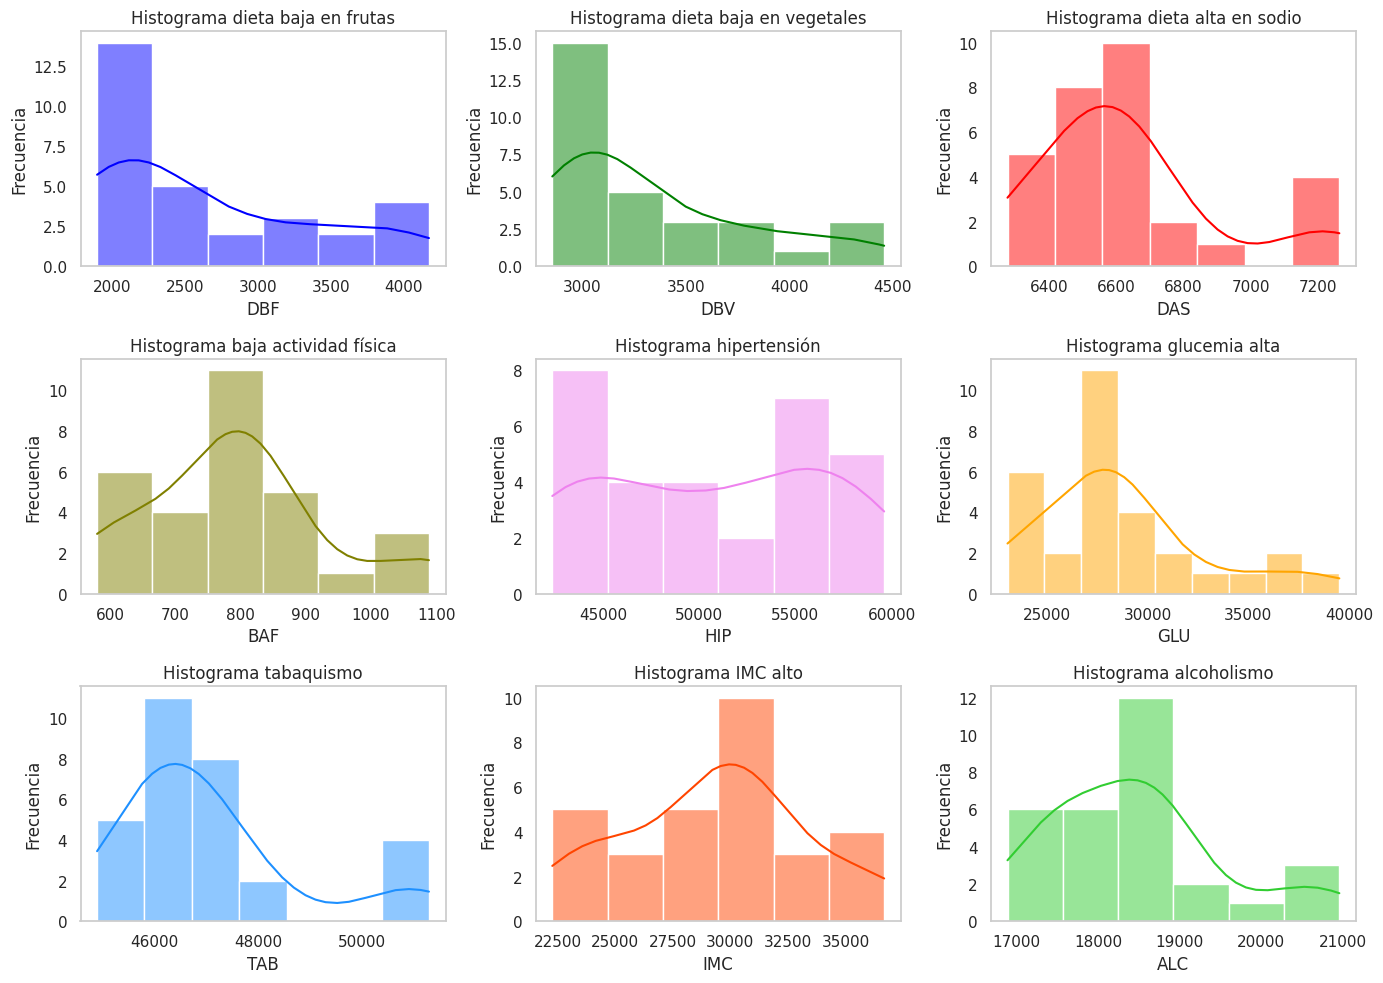

In [371]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 3, figsize=(14, 10))

# Dieta Baja en Frutas
sns.histplot(arg_cor['DBF'], kde=True, color='blue', ax=axs[0,0])
axs[0,0].set_title("Histograma dieta baja en frutas")
axs[0,0].set_xlabel("DBF")
axs[0,0].set_ylabel("Frecuencia")
axs[0,0].grid(False)

# Dieta Baja en Vegetales
sns.histplot(arg_cor['DBV'], kde=True, color='green', ax=axs[0,1])
axs[0,1].set_title("Histograma dieta baja en vegetales")
axs[0,1].set_xlabel("DBV")
axs[0,1].set_ylabel("Frecuencia")
axs[0,1].grid(False)

# Dieta Alta en Sodio
sns.histplot(arg_cor['DAS'], kde=True, color='red', ax=axs[0,2])
axs[0,2].set_title("Histograma dieta alta en sodio")
axs[0,2].set_xlabel("DAS")
axs[0,2].set_ylabel("Frecuencia")
axs[0,2].grid(False)

# Baja Actividad Física
sns.histplot(arg_cor['BAF'], kde=True, color='olive', ax=axs[1,0])
axs[1,0].set_title("Histograma baja actividad física")
axs[1,0].set_xlabel("BAF")
axs[1,0].set_ylabel("Frecuencia")
axs[1,0].grid(False)

# Hipertensión
sns.histplot(arg_cor['HIP'], kde=True, color='violet', ax=axs[1,1])
axs[1,1].set_title("Histograma hipertensión")
axs[1,1].set_xlabel("HIP")
axs[1,1].set_ylabel("Frecuencia")
axs[1,1].grid(False)

# Glucemia Alta
sns.histplot(arg_cor['GLU'], kde=True, color='orange', ax=axs[1,2])
axs[1,2].set_title("Histograma glucemia alta")
axs[1,2].set_xlabel("GLU")
axs[1,2].set_ylabel("Frecuencia")
axs[1,2].grid(False)

# Tabaquismo
sns.histplot(arg_cor['TAB'], kde=True, color='dodgerblue', ax=axs[2,0])
axs[2,0].set_title("Histograma tabaquismo")
axs[2,0].set_xlabel("TAB")
axs[2,0].set_ylabel("Frecuencia")
axs[2,0].grid(False)

# IMC Alto
sns.histplot(arg_cor['IMC'], kde=True, color='orangered', ax=axs[2,1])
axs[2,1].set_title("Histograma IMC alto")
axs[2,1].set_xlabel("IMC")
axs[2,1].set_ylabel("Frecuencia")
axs[2,1].grid(False)

# Alcoholismo
sns.histplot(arg_cor['ALC'], kde=True, color='limegreen', ax=axs[2,2])
axs[2,2].set_title("Histograma alcoholismo")
axs[2,2].set_xlabel("ALC")
axs[2,2].set_ylabel("Frecuencia")
axs[2,2].grid(False)

plt.tight_layout()
plt.show()


Se grafican los diagramas de caja de cada factor en función del tiempo (años).

In [372]:
l=[x for x in arg_cor.columns]
datos= arg_cor[l]
datos.head()

,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
AÑO,,,,,,,,,
1990,4172,4459,6717,778,42440,23040,46415,22271,18840
1991,4060,4324,6661,691,42365,23242,45869,22689,18775
1992,4009,4272,6730,648,43143,23940,46216,23518,18993
1993,3854,4122,6662,612,43103,24239,45708,23909,18801
1994,3654,3922,6499,580,42456,24199,44885,24043,18544


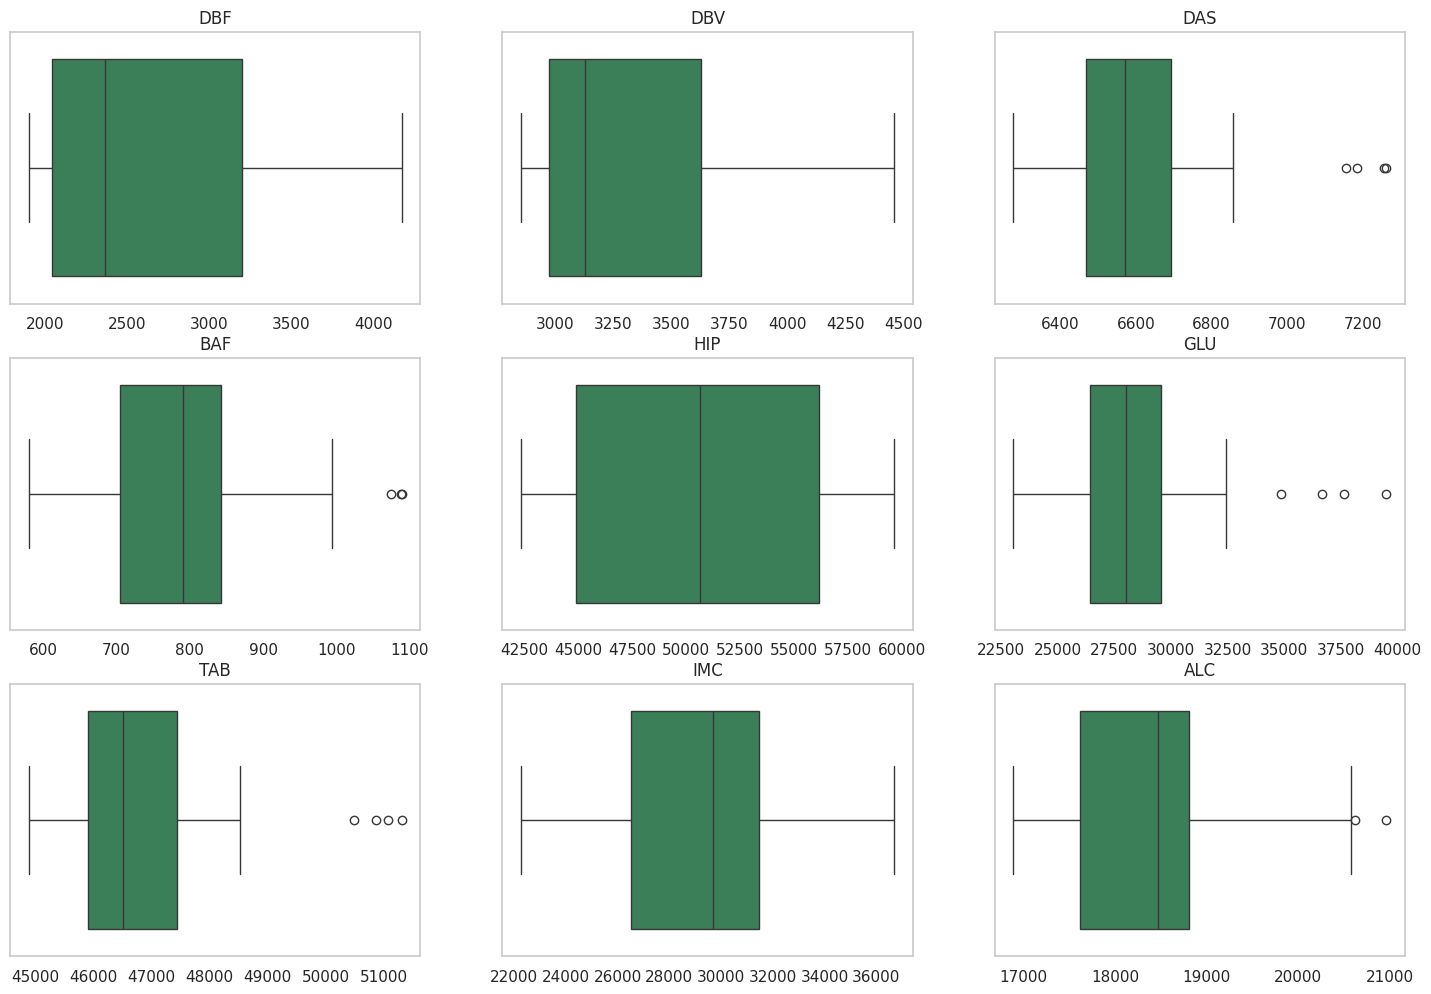

In [373]:
plt.figure(figsize=(18,12))
for i,j in zip(range(9),datos.columns):
  plt.subplot(3,3,i+1)
  sns.boxplot(x=datos[j],color ='seagreen')
  plt.title(j)
  plt.grid(False)
  plt.xlabel('')

Se observan 5 diagramas de cajas con datos anómalos: DAS (Dieta alta en sodio), BAF (Baja actividad física), GLU (Glucemia alta), TAB (Tabaquismo) y ALC (Alcoholismo). Se analiza cada uno por separado por IQR y Z-score.

Para DAS

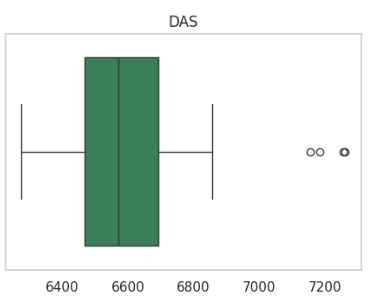

IQR:

In [374]:
Q1 = arg_cor['DAS'].quantile(0.25)
Q3 = arg_cor['DAS'].quantile(0.75)
IQR = Q3-Q1
Mediana = arg_cor['DAS'].median()
minimo = arg_cor['DAS'].min()
maximo = arg_cor['DAS'].max()
print ("Primer Cuartil",Q1)
print ("Tercer Cuartil",Q3)
print ("Rango Intercuartil",IQR)
print ("Valor Mínimo",minimo)
print ("Valor Máximo",maximo)

Primer Cuartil 6467.75
Tercer Cuartil 6692.0
Rango Intercuartil 224.25
Valor Mínimo 6276
Valor Máximo 7263


In [375]:
#Bigotes
B1 = (Q1-1.5*IQR)
B2 = (Q3+1.5*IQR)
print ("Bigote inferior",B1)
print ("Bigote superior",B2)

Bigote inferior 6131.375
Bigote superior 7028.375


In [376]:
#Detecto outliers
outliers_das = (arg_cor['DAS']<B1) | (arg_cor['DAS']>B2)
outliers_das

AÑO
1990    False
1991    False
1992    False
1993    False
1994    False
1995    False
1996    False
1997    False
1998    False
1999    False
2000    False
2001    False
2002    False
2003    False
2004    False
2005    False
2006    False
2007    False
2008    False
2009    False
2010    False
2011    False
2012    False
2013    False
2014    False
2015    False
2016     True
2017     True
2018     True
2019     True
Name: DAS, dtype: bool

In [377]:
total_outliers_das = arg_cor[outliers_das]
print ("La cantidad de outliers son",len(total_outliers_das))

La cantidad de outliers son 4


In [378]:
total_outliers_das['DAS']

AÑO
2016    7157
2017    7263
2018    7186
2019    7258
Name: DAS, dtype: int64

Z-score: Se logran eliminar los outliers.

In [379]:
data_das = arg_cor['DAS']
# Calcular la media y la desviación estándar
mean = np.mean(data_das)
std_dev = np.std(data_das)

# Calcular los z-scores
z_scores = [(x - mean) / std_dev for x in data_das]

# Identificar los outliers
outliers_score_das = [x for x, z in zip(data_das, z_scores) if abs(z) > 3]

mean, std_dev, z_scores, outliers_score_das

(6632.866666666667,
 267.60016608531635,
 [0.3143994062638579,
  0.10513197261754963,
  0.36297934621746514,
  0.10886889107551942,
  -0.5002488175735563,
  -0.35450899771273453,
  -0.31713981313303663,
  -0.23866452551567102,
  0.0827104618697309,
  0.2284502817305527,
  -0.6198302082285896,
  -0.6086194528546802,
  -0.26855987317942936,
  -0.15645231944033566,
  -0.8365714787908374,
  -1.3335816337008195,
  -1.3148970414109704,
  -0.7244639250517437,
  -1.3111601229530008,
  -1.184104895382028,
  -0.631040963602499,
  -0.39187818229243243,
  -0.21997993322582207,
  0.060288951121912154,
  0.1985549340667944,
  0.8338310719216586,
  1.9586435277705654,
  2.3547568843153632,
  2.0670141630516894,
  2.336072292025514],
 [])

In [380]:
print ("La cantidad de outliers para Dieta alta en sodio son:",len(outliers_score_das))

La cantidad de outliers para Dieta alta en sodio son: 0


Se logran eliminar los outliers

Para BAF

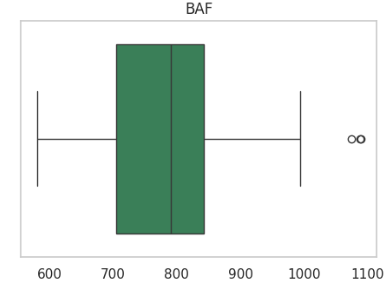

In [381]:
# IQR
Q1 = arg_cor['BAF'].quantile(0.25)
Q3 = arg_cor['BAF'].quantile(0.75)
IQR = Q3-Q1
Mediana = arg_cor['BAF'].median()
minimo = arg_cor['BAF'].min()
maximo = arg_cor['BAF'].max()
print ("Primer Cuartil",Q1)
print ("Tercer Cuartil",Q3)
print ("Rango Intercuartil",IQR)
print ("Valor Mínimo",minimo)
print ("Valor Máximo",maximo)

Primer Cuartil 704.0
Tercer Cuartil 842.25
Rango Intercuartil 138.25
Valor Mínimo 580
Valor Máximo 1089


In [382]:
#Bigotes
B1 = (Q1-1.5*IQR)
B2 = (Q3+1.5*IQR)
print ("Bigote inferior",B1)
print ("Bigote superior",B2)

Bigote inferior 496.625
Bigote superior 1049.625


In [383]:
#Detecto outliers
outliers_baf = (arg_cor['BAF']<B1) | (arg_cor['BAF']>B2)
outliers_baf

AÑO
1990    False
1991    False
1992    False
1993    False
1994    False
1995    False
1996    False
1997    False
1998    False
1999    False
2000    False
2001    False
2002    False
2003    False
2004    False
2005    False
2006    False
2007    False
2008    False
2009    False
2010    False
2011    False
2012    False
2013    False
2014    False
2015    False
2016    False
2017     True
2018     True
2019     True
Name: BAF, dtype: bool

In [384]:
total_outliers_baf = arg_cor[outliers_baf]
print ("La cantidad de outliers son",len(total_outliers_baf))

La cantidad de outliers son 3


In [385]:
total_outliers_baf['BAF']

AÑO
2017    1089
2018    1075
2019    1088
Name: BAF, dtype: int64

In [386]:
data_baf = arg_cor['BAF']
# Calcular la media y la desviación estándar
mean = np.mean(data_baf)
std_dev = np.std(data_baf)
# Calcular los z-scores
z_scores = [(x - mean) / std_dev for x in data_baf]
# Identificar los outliers
outliers_score_baf = [x for x, z in zip(data_baf, z_scores) if abs(z) > 3]
mean, std_dev, z_scores, outliers_score_baf

(792.8,
 135.71646915536817,
 [-0.10905087711246686,
  -0.7500931952735916,
  -1.0669302031003545,
  -1.3321890933739233,
  -1.5679747736170957,
  -1.5385015635866992,
  -1.4427136309879103,
  -1.1848230432219407,
  -0.7574614977811908,
  -0.3669414648784366,
  -0.33746825484804005,
  -0.23431201974165217,
  -0.07220936457447119,
  0.08989329059270978,
  0.008841963009119297,
  -0.05747275955927292,
  -0.02799954952887638,
  0.156208013161102,
  -0.013262944513678107,
  0.060420080562313246,
  0.266732550775089,
  0.3477838783586795,
  0.36988878588147694,
  0.4435718109574683,
  0.4951499285106622,
  0.701462398723438,
  1.4825024645289464,
  2.1824912027508643,
  2.0793349676444763,
  2.1751229002432653],
 [])

In [387]:
print ("La cantidad de outliers para Baja actividad física son:",len(outliers_score_baf))

La cantidad de outliers para Baja actividad física son: 0


Para GLU

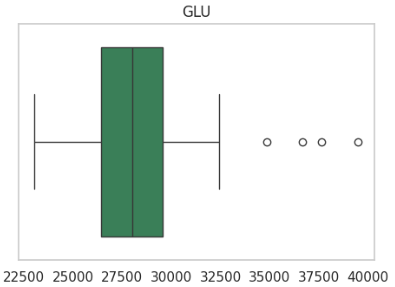

In [388]:
Q1 = arg_cor['GLU'].quantile(0.25)
Q3 = arg_cor['GLU'].quantile(0.75)
IQR = Q3-Q1
Mediana = arg_cor['GLU'].median()
minimo = arg_cor['GLU'].min()
maximo = arg_cor['GLU'].max()
print ("Primer Cuartil",Q1)
print ("Tercer Cuartil",Q3)
print ("Rango Intercuartil",IQR)
print ("Valor Mínimo",minimo)
print ("Valor Máximo",maximo)


Primer Cuartil 26442.5
Tercer Cuartil 29571.75
Rango Intercuartil 3129.25
Valor Mínimo 23040
Valor Máximo 39517


In [389]:
#Bigotes
B1 = (Q1-1.5*IQR)
B2 = (Q3+1.5*IQR)
print ("Bigote inferior",B1)
print ("Bigote superior",B2)

Bigote inferior 21748.625
Bigote superior 34265.625


In [390]:
#Detecto outliers
outliers_glu = (arg_cor['GLU']<B1) | (arg_cor['GLU']>B2)
outliers_glu

AÑO
1990    False
1991    False
1992    False
1993    False
1994    False
1995    False
1996    False
1997    False
1998    False
1999    False
2000    False
2001    False
2002    False
2003    False
2004    False
2005    False
2006    False
2007    False
2008    False
2009    False
2010    False
2011    False
2012    False
2013    False
2014    False
2015    False
2016     True
2017     True
2018     True
2019     True
Name: GLU, dtype: bool

In [391]:
total_outliers_glu = arg_cor[outliers_glu]
print ("La cantidad de outliers son",len(total_outliers_glu))
total_outliers_glu['GLU']

La cantidad de outliers son 4


AÑO
2016    34856
2017    36691
2018    37660
2019    39517
Name: GLU, dtype: int64

In [392]:
data_glu = arg_cor['GLU']
# Calcular la media y la desviación estándar
mean = np.mean(data_glu)
std_dev = np.std(data_glu)
# Calcular los z-scores
z_scores = [(x - mean) / std_dev for x in data_glu]
# Identificar los outliers
outliers_score_glu= [x for x, z in zip(data_glu, z_scores) if abs(z) > 3]
mean, std_dev, z_scores, outliers_score_glu

(28676.266666666666,
 4037.962034932418,
 [-1.395819628294499,
  -1.3457943932248035,
  -1.172934917587935,
  -1.0988876636976432,
  -1.1087936508401572,
  -0.9557461494883167,
  -0.8237488708143184,
  -0.6224096821427223,
  -0.34553734150945736,
  -0.13354921665965885,
  -0.25663110690539465,
  -0.19868108212168806,
  -0.0835239815899634,
  -0.005761982521228888,
  -0.16549602519426634,
  -0.2831296225116195,
  -0.27991017669030244,
  -0.0835239815899634,
  -0.24078152747737236,
  -0.1647530761585778,
  0.006125202049787852,
  0.13242653811684071,
  0.251546033505571,
  0.43084440078507347,
  0.5861207492439796,
  0.9335732482676564,
  1.530408973604122,
  1.9848461337669494,
  2.22481867229435,
  2.68470412538556],
 [])

In [393]:
print ("La cantidad de outliers para Glucemia alta son:",len(outliers_score_glu))

La cantidad de outliers para Glucemia alta son: 0


Para TAB

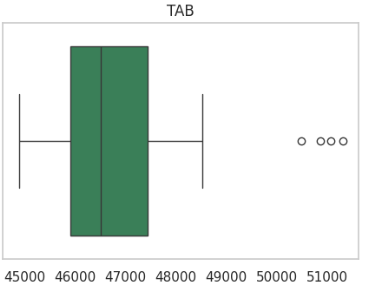

In [394]:
Q1 = arg_cor['TAB'].quantile(0.25)
Q3 = arg_cor['TAB'].quantile(0.75)
IQR = Q3-Q1
Mediana = arg_cor['TAB'].median()
minimo = arg_cor['TAB'].min()
maximo = arg_cor['TAB'].max()
print ("Primer Cuartil",Q1)
print ("Tercer Cuartil",Q3)
print ("Rango Intercuartil",IQR)
print ("Valor Mínimo",minimo)
print ("Valor Máximo",maximo)

Primer Cuartil 45901.75
Tercer Cuartil 47444.75
Rango Intercuartil 1543.0
Valor Mínimo 44885
Valor Máximo 51306


In [395]:
#Bigotes
B1 = (Q1-1.5*IQR)
B2 = (Q3+1.5*IQR)
print ("Bigote inferior",B1)
print ("Bigote superior",B2)

Bigote inferior 43587.25
Bigote superior 49759.25


In [396]:
#Detecto outliers
outliers_tab = (arg_cor['TAB']<B1) | (arg_cor['TAB']>B2)
outliers_tab

AÑO
1990    False
1991    False
1992    False
1993    False
1994    False
1995    False
1996    False
1997    False
1998    False
1999    False
2000    False
2001    False
2002    False
2003    False
2004    False
2005    False
2006    False
2007    False
2008    False
2009    False
2010    False
2011    False
2012    False
2013    False
2014    False
2015    False
2016     True
2017     True
2018     True
2019     True
Name: TAB, dtype: bool

In [397]:
total_outliers_tab = arg_cor[outliers_tab]
print ("La cantidad de outliers son",len(total_outliers_tab))
total_outliers_tab['TAB']

La cantidad de outliers son 4


AÑO
2016    50483
2017    51077
2018    50863
2019    51306
Name: TAB, dtype: int64

In [398]:
data_tab = arg_cor['TAB']
# Calcular la media y la desviación estándar
mean = np.mean(data_tab)
std_dev = np.std(data_tab)
# Calcular los z-scores
z_scores = [(x - mean) / std_dev for x in data_tab]
# Identificar los outliers
outliers_score_tab = [x for x, z in zip(data_tab, z_scores) if abs(z) > 3]
mean, std_dev, z_scores, outliers_score_tab

(47078.13333333333,
 1706.653347604278,
 [-0.3885577198581116,
  -0.7084820915920961,
  -0.5051601923399118,
  -0.8028187653085274,
  -1.2850490912005954,
  -1.1438370516623348,
  -0.8918819603700029,
  -0.6510597684603552,
  -0.32351814978032356,
  -0.07800842128849299,
  -0.8233267378555776,
  -0.7020367287915945,
  -0.20867350351684194,
  0.06261767617699467,
  -0.44480815884430663,
  -0.7278181799936005,
  -0.6164891861667562,
  0.1212118834542812,
  -0.3985187350952503,
  -0.3369948174540994,
  -0.06277392739639849,
  0.14406362429242295,
  0.23840029800885426,
  0.3579324808545188,
  0.29113508455841214,
  0.8512957061292713,
  1.9950546321819043,
  2.3431042234089863,
  2.217712619835593,
  2.4772849580739726],
 [])

In [399]:
print ("La cantidad de outliers para Tabaquismo:",len(outliers_score_tab))

La cantidad de outliers para Tabaquismo: 0


Para ALC

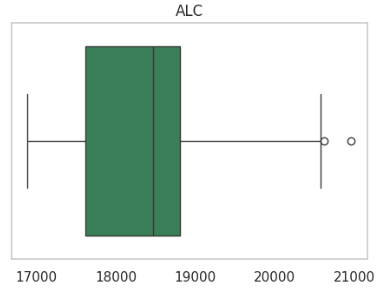

In [400]:
Q1 = arg_cor['ALC'].quantile(0.25)
Q3 = arg_cor['ALC'].quantile(0.75)
IQR = Q3-Q1
Mediana = arg_cor['ALC'].median()
minimo = arg_cor['ALC'].min()
maximo = arg_cor['ALC'].max()
print ("Primer Cuartil",Q1)
print ("Tercer Cuartil",Q3)
print ("Rango Intercuartil",IQR)
print ("Valor Mínimo",minimo)
print ("Valor Máximo",maximo)


Primer Cuartil 17621.0
Tercer Cuartil 18803.25
Rango Intercuartil 1182.25
Valor Mínimo 16890
Valor Máximo 20962


In [401]:
#Bigotes
B1 = (Q1-1.5*IQR)
B2 = (Q3+1.5*IQR)
print ("Bigote inferior",B1)
print ("Bigote superior",B2)

Bigote inferior 15847.625
Bigote superior 20576.625


In [402]:
#Detecto outliers
outliers_alc = (arg_cor['ALC']<B1) | (arg_cor['ALC']>B2)
outliers_alc

AÑO
1990    False
1991    False
1992    False
1993    False
1994    False
1995    False
1996    False
1997    False
1998    False
1999    False
2000    False
2001    False
2002    False
2003    False
2004    False
2005    False
2006    False
2007    False
2008    False
2009    False
2010    False
2011    False
2012    False
2013    False
2014    False
2015    False
2016    False
2017    False
2018     True
2019     True
Name: ALC, dtype: bool

In [403]:
total_outliers_alc = arg_cor[outliers_alc]
print ("La cantidad de outliers son",len(total_outliers_alc))
total_outliers_alc['ALC']

La cantidad de outliers son 2


AÑO
2018    20625
2019    20962
Name: ALC, dtype: int64

In [404]:
data_alc = arg_cor['ALC']
# Calcular la media y la desviación estándar
mean = np.mean(data_alc)
std_dev = np.std(data_alc)
# Calcular los z-scores
z_scores = [(x - mean) / std_dev for x in data_alc]
# Identificar los outliers
outliers_score_alc = [x for x, z in zip(data_alc, z_scores) if abs(z) > 3]
mean, std_dev, z_scores, outliers_score_alc


(18455.733333333334,
 1043.45668919329,
 [0.36826316860716857,
  0.3059702141671981,
  0.5148911998274066,
  0.3308873959431863,
  0.08459063761899552,
  0.07884051874761362,
  0.1564671235112691,
  0.10950781939498368,
  -0.045745390132327236,
  -0.18087318360980156,
  -0.7501349518766083,
  -0.8124279063165787,
  -0.7625935427646023,
  -0.8900545110802341,
  -1.3903148528904583,
  -1.5005254645919444,
  -1.3174800138529543,
  -0.8478869726901003,
  -0.9370138151965195,
  -0.865137329304246,
  -0.676341759693874,
  -0.40129440701277386,
  -0.08791292852246106,
  0.20150972133709386,
  0.3337624553788772,
  0.7822717273466643,
  1.6907905090250024,
  2.0271724630008428,
  2.07892353284328,
  2.4018885427858954],
 [])

In [405]:
print ("La cantidad de outliers para Aloholismo:",len(outliers_score_alc))

La cantidad de outliers para Aloholismo: 0


Todos los outliers o datos anómalos se logran eliminar con el método z-score tomando un threshold de 3 (3 desviaciones estándar).

# Modelado

En esta sección se va a trabajar con los los modelos de aprendizaje y predicción. Al tratarse de datos numéricos de decesos de diferentes factores de riesgo a lo largo de los años se decide trabajar con una regresión lineal múltiple.

En primer lugar se modifica el dataset original llamado arg_cor por un dataset con la columna AÑOS como primer columna. El índice se cambia por una sucesión de números del 0 al 29 (son 30 filas).

Luego se determina la relación lineal de cada factor de riesgo. Esto se pudo ver un poco en la sección 5.

In [406]:
# Se modifica el dataset y se muestra un poco de su información de las columnas
data_cor = pd.DataFrame(arg_cor)
data_cor.insert(0,'AÑO',data_cor.index)
data_cor.reset_index(drop=True, inplace=True)
data_cor.info()
data_cor.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AÑO     30 non-null     int64
 1   DBF     30 non-null     int64
 2   DBV     30 non-null     int64
 3   DAS     30 non-null     int64
 4   BAF     30 non-null     int64
 5   HIP     30 non-null     int64
 6   GLU     30 non-null     int64
 7   TAB     30 non-null     int64
 8   IMC     30 non-null     int64
 9   ALC     30 non-null     int64
dtypes: int64(10)
memory usage: 2.5 KB


,AÑO,DBF,DBV,DAS,BAF,HIP,GLU,TAB,IMC,ALC
0,1990,4172,4459,6717,778,42440,23040,46415,22271,18840
1,1991,4060,4324,6661,691,42365,23242,45869,22689,18775
2,1992,4009,4272,6730,648,43143,23940,46216,23518,18993


In [407]:
# Librerías que van a hacer falta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from sklearn.model_selection import train_test_split
from typing import Union

Ahora, se dividen los datos para entrenamiento y test. El 20% de los datos se usan para test y el resto para entrenamiento del modelo.

In [408]:
X = data_cor[['AÑO']]
y = data_cor.drop(columns=['AÑO'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Es importante para este modelo lineal múltiple, estudiar la relación que existe entre todas las variables. Si no existen relaciones entre ningunas o son bajas, el modelo no sirve. Se calcula el parámetro de linealidad r. Este parámetro debe ser cercano a 1 (o -1).

In [409]:
corr_matrix = data_cor.corr(method='pearson')
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix[tril] = np.nan
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})
corr_matrix_tidy = corr_matrix_tidy.dropna()
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)
corr_matrix_tidy

,variable_1,variable_2,r,r_abs
0,DBF,DBV,0.992996,0.992996
1,AÑO,HIP,0.986864,0.986864
2,AÑO,IMC,0.977461,0.977461
3,HIP,IMC,0.959157,0.959157
4,DAS,ALC,0.952479,0.952479
5,GLU,IMC,0.949140,0.949140
6,GLU,TAB,0.939973,0.939973
7,BAF,TAB,0.930124,0.930124
8,BAF,GLU,0.926918,0.926918
9,AÑO,DBF,-0.924500,0.924500


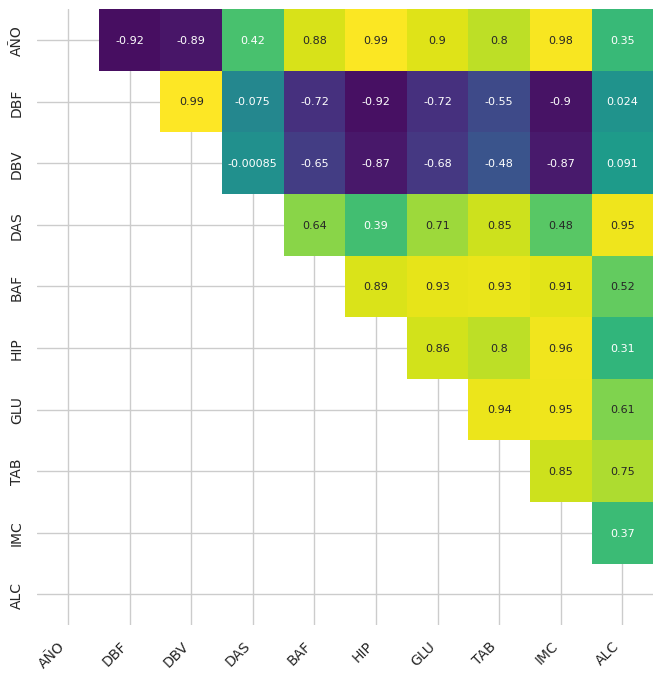

In [410]:
# Se grafica una matriz de correlaciones para poder más claramente las relaciones entre variables
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = "viridis",
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 10)

Los resultados están ordenados de mayor a menor y eso ayuda mucho a la hora de procesar la información.

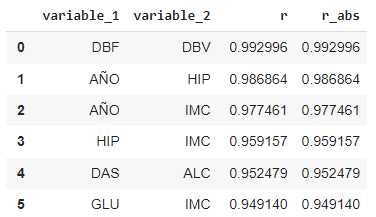

Las correlaciones entre factores de riesgo (son 8) con un r mayor a +- 0,9 no son casuales. Como se estudió antes, todos estos factores están íntimamente relacionados con la enfermedad coronaria. Se estudiarán las 7 primeras salidas de la tabla de relación lineal.

a) DBF y DBV: Estos dos factores se estudiaron en la sección 5 y se pudo concluir que existe una importante correlación entre ambos. Si disminuyen los decesos por un aumento de consumo de frutas se espera que también suceda lo mismo con el aumento en el consumo de vegetales. Esto ocurre por la simple razón de que frutas y verduras se pueden comprar en el mismo lugar. Si se compran frutas, en general, se compran verduras.

Esta no es la única razón, ya que los argentinos intentan mejorar su alimentación incorporando frutas y vegetales conociendo los beneficios que trae. Además, los precios de otros alimentos (carnes principalmente) aumentan notablemente con el correr de los años y los vegetales y frutas es una buena alternativa ya que tienen precios oscilantes de acuerdo a la época del año.

b) AÑO y HIP: En este caso, se puede determinar una función matemática que puede predecir los decesos en años posteriores al 2019. Es más interesante relacionar este factor con otros factores y no con el año.

c) AÑO y IMC: Se conoce que debido a la variedad de alimentos procesados y su bajo precio comparado con otros alimentos, es una opción rápida y económica a la hora de alimentarse. Muchos de los alimentos procesados tienen grasas saturadas, sal en exceso, glutamato, azúcar, etc, que contribuye a la obesidad y por lo tanto, a un imc alto. De seguir con esta tendencia, se esperan más fallecimientos debido a este factor.

d) HIP y IMC: Estos dos factores muestran una excelente correlación lineal. Puede concluirse que la hipertensión está relacionada al consumo de alimentos procesados y de alto contenido en grasa con el respectivo aumento del índice de masa corporal. Se grafica dicha correlación:

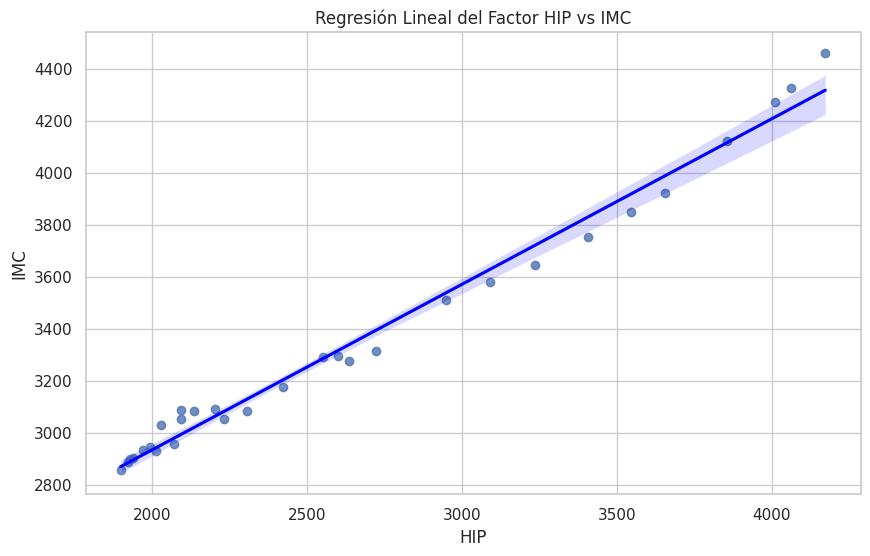

In [411]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.regplot(x="DBF", y="DBV", data= arg_cor, line_kws={"color": "blue"})
ax.set_title("Regresión Lineal del Factor HIP vs IMC")
ax.set_xlabel("HIP")
ax.set_ylabel("IMC")
plt.show()

Mostrando los resultados con statsmodels se puede ver que el ajuste por el R^2 es 0,92 que es muy bueno.

In [412]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = arg_cor['IMC']
Y = arg_cor['HIP']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
results_summary = model.summary()
print(results_summary)


                            OLS Regression Results                            
Dep. Variable:                    HIP   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     321.9
Date:                Tue, 28 May 2024   Prob (F-statistic):           6.85e-17
Time:                        23:13:59   Log-Likelihood:                -265.00
No. Observations:                  30   AIC:                             534.0
Df Residuals:                      28   BIC:                             536.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8310.0216   2381.330      3.490      0.0

e) DAS y ALC: Es este caso, la relación con una dieta alta en sodio y el alcoholismo es muy buena en lo matemático. Podría inferirse que el consumo de alimentos viene aparejado con el consumo de alcohol, pero, es algo común en la mesa de los argentinos, compartir una comida con una bebida. Si no se hace en exceso, no debería influir en la cantidad de decesos. De todas maneras, se muestran los resultados de la gráfica y su tabla de información:

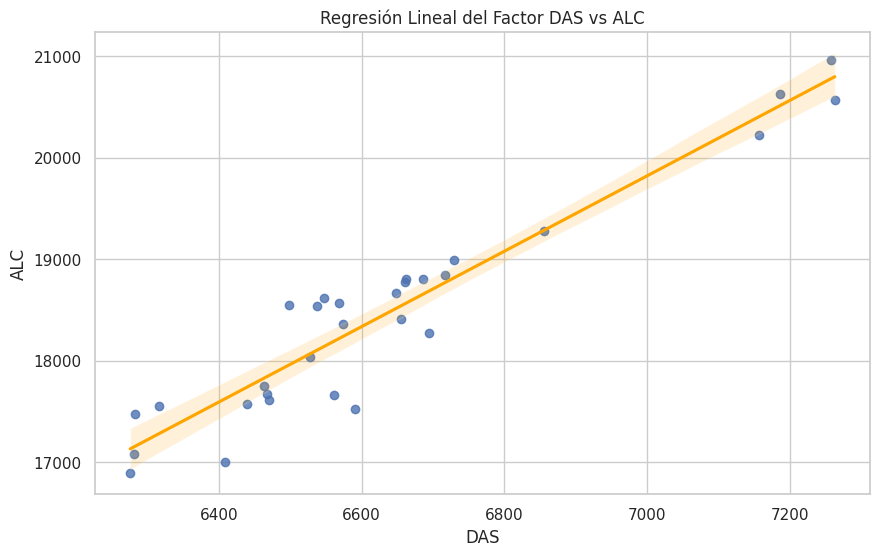

In [413]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.regplot(x="DAS", y="ALC", data= arg_cor, line_kws={"color": "orange"})
ax.set_title("Regresión Lineal del Factor DAS vs ALC")
ax.set_xlabel("DAS")
ax.set_ylabel("ALC")
plt.show()

In [414]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = arg_cor['DAS']
Y = arg_cor['ALC']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
results_summary = model.summary()
print(results_summary)

                            OLS Regression Results                            
Dep. Variable:                    ALC   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     273.8
Date:                Tue, 28 May 2024   Prob (F-statistic):           5.48e-16
Time:                        23:14:00   Log-Likelihood:                -215.41
No. Observations:                  30   AIC:                             434.8
Df Residuals:                      28   BIC:                             437.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6178.8340   1490.038     -4.147      0.0

f) GLU y IMC: Estos dos factores están muy relacionados entre sí. Al consumir alimentos con alto contenido en azúcar se predispone a valores altos en glucosa en sangre. Este consumo repetitivo y continuo genera obesidad y por lo tanto, un mayor IMC. Se grafican:

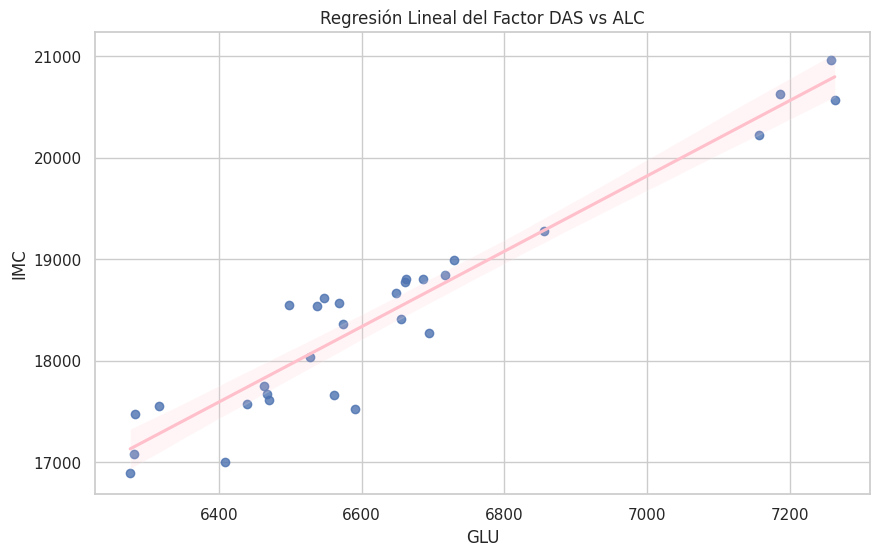

In [415]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.regplot(x="DAS", y="ALC", data= arg_cor, line_kws={"color": "pink"})
ax.set_title("Regresión Lineal del Factor DAS vs ALC")
ax.set_xlabel("GLU")
ax.set_ylabel("IMC")
plt.show()

In [416]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = arg_cor['GLU']
Y = arg_cor['IMC']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
results_summary = model.summary()
print(results_summary)

                            OLS Regression Results                            
Dep. Variable:                    IMC   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     254.4
Date:                Tue, 28 May 2024   Prob (F-statistic):           1.39e-15
Time:                        23:14:00   Log-Likelihood:                -255.89
No. Observations:                  30   AIC:                             515.8
Df Residuals:                      28   BIC:                             518.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3057.5546   1660.469      1.841      0.0

Para finalizar este trabajo, se desea predecir como van a variar los 9 factores estudiados para enfermedades coronarias en los próximos años. Se intenta predecir que sucederá entre los años 2020 y 2030.

In [417]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data = data_cor
# Dividimos los datos en características (X) y etiquetas (y)
X = data[['AÑO']]
y = data.drop(columns=['AÑO'])
# Se separan los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Se inicia y entrena el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)
# Evaluamos el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Error cuadrático medio:', mse)
# Predecir los decesos para los años 2020 a 2030
X_2020_2030 = pd.DataFrame({'AÑO': range(2020, 2031)})
deaths_pred_2020_2030 = model.predict(X_2020_2030)
print('Predicciones de decesos para 2020-2030:')
print(deaths_pred_2020_2030)

Error cuadrático medio: 991452.7672242988
Predicciones de decesos para 2020-2030:
[[ 1346.86663306  2536.8233871   6735.0780746    992.76628024
  61297.32948589 34627.07076613 49192.57132056 35977.6061996
  18721.87701613]
 [ 1264.12127016  2485.59596774  6744.02878024  1006.09460685
  61980.28543347 35025.40504032 49337.60408266 36414.62565524
  18746.34879032]
 [ 1181.37590726  2434.36854839  6752.97948589  1019.42293347
  62663.24138105 35423.73931452 49482.63684476 36851.64511089
  18770.82056452]
 [ 1098.63054435  2383.14112903  6761.93019153  1032.75126008
  63346.19732863 35822.07358871 49627.66960685 37288.66456653
  18795.29233871]
 [ 1015.88518145  2331.91370968  6770.88089718  1046.07958669
  64029.15327621 36220.4078629  49772.70236895 37725.68402218
  18819.7641129 ]
 [  933.13981855  2280.68629032  6779.83160282  1059.40791331
  64712.10922379 36618.7421371  49917.73513105 38162.70347782
  18844.2358871 ]
 [  850.39445565  2229.45887097  6788.78230847  1072.73623992
  653

Se grafica:

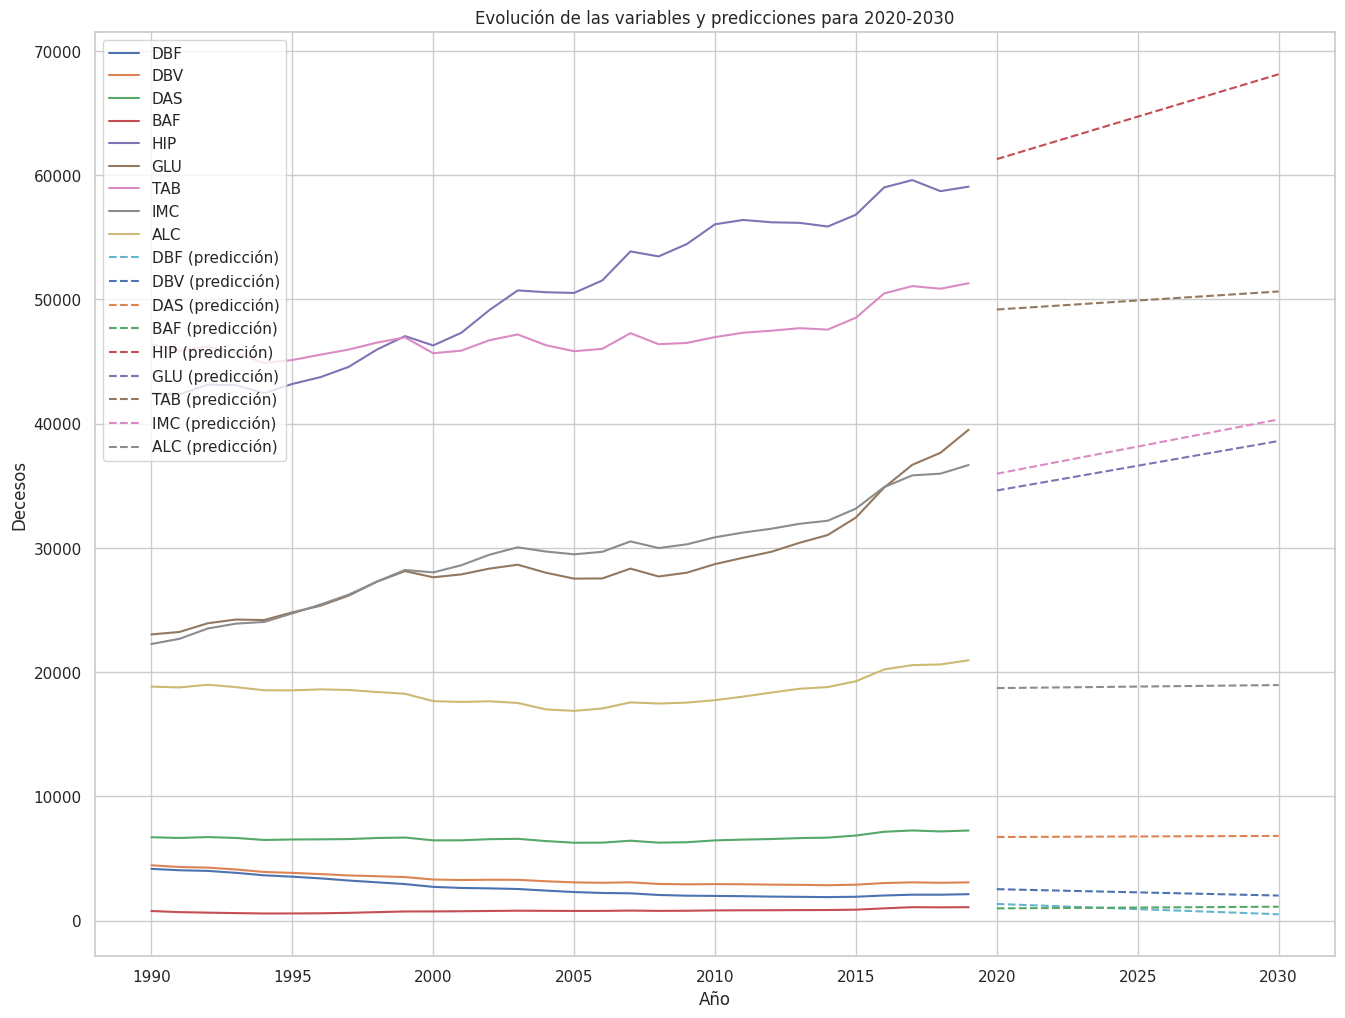

In [418]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
# Graficamos las variables originales
for column in y.columns:
    plt.plot(data['AÑO'], data[column], label=column)

# Graficamos las predicciones para los años 2020 a 2030
for i, column in enumerate(y.columns):
    plt.plot(range(2020, 2031), deaths_pred_2020_2030[:, i], linestyle='--', label=f'{column} (predicción)')
plt.xlabel('Año')
plt.ylabel('Decesos')
plt.title('Evolución de las variables y predicciones para 2020-2030')
plt.legend()
plt.grid(True)
plt.show()

De acuerdo al modelo de regresión múltiple se predice lo siguiente:

1 - Hipertensión: Se espera un aumento notable de decesos por este factor de riesgo, llegando aproximadamente a los 68000 decesos para el año 2030.

2 - Tabaquismo: El incremento de fallecimientos por este factor aumenta levemente durante el período de predicción, llegando aproximadamente a los 50600 decesos para el año 2030.

3 - IMC Alto: Este factor muestra una tendencia de aumento de casos de decesos, llegando aproximadamente los 38300 casos para el año 2030.

4 - Hiperglucemia: Sucede lo mismo con la glucemia que con los factores anteriores. Se esperan más de 40000 casos de fallecimientos para el 2030.

5 - Alcoholismo: Se espera que los fallecimientos debido al alcoholismo disminuyan a partir del año 2020 y se mantengan más o menos iguales hasta el 2030 con aproximadamente 18600 casos.

6 - Dieta alta en sodio: Se espera que los casos disminuyan ligeramente para el año 2020 y se mantenga constante hasta el año 2030 (se predicen unos 6600 fallecimientos aproximadamente).

7 - Dieta baja en vegetales y Dieta baja en frutas: Los casos de decesos debido a los dos factores disminuirían con el correr de los años, llegando a 1150 casos para DBV y 570 casos para DBF para el 2030.

9 - Baja actividad física: Se espera que no hayan grandes cambios en los decesos debido a la poca actividad física, manteniendo constante la incidencia desde el período de 2020 a 2030 con 1400 decesos aproximadamente.


#Parte 7: Conclusiones

Luego de determinar y analizar 9 factores de riesgo asociados a las enfermedades cardiovasculares en la Argentina desde el año 1990 a 2019 se puede concluir:

a) En general, todos los decesos por los factores de riesgo en estudio van en aumento.

b) Los factores de riesgo que más contribuyen a las enfermedades coronarias son la hipertensión, el tabaquismo, la obesidad y la hiperglucemia.

c) Los decesos que más disminuyeron durante el período de 1990 a 2019 se deben al aumento de consumo de frutas y verduras por parte de la población. La sociedad conoce los beneficios de consumir regularmente frutas y verduras y trata de incorporarlas en su dieta diaria.

d) Se registra un aumento marcado en los fallecimientos debido a la hipertensión, hiperglucemia, tabaquismo y obesidad.

e) Sumando los valores de los 9 factores de riesgo estudiados se determina que en todos los años la prevalencia de muertes debido a las enfermedades cardiovasculares ronda el 70%.

f) Sacando un promedio de todos los años, la prevalencia de las enfermedades cardiovasculares o coronarias superan el 70%. Este valor contradice lo reportado por el Gobierno de la República Argentina que oscila en el 35%.

g) Se piensa que se tomaron factores de riesgo de más a la hora de analizar la enfermedad coronaria. Por lo tanto, se estudiaron dos factores de mayor incidencia que son las muertes por el tabaco y la hipertensión. Con estos dos factores se llega a un valor un poco mayor del 35%.

h) Existen datos anómalos o outliers que fueron estudiados y eliminados gracias a las herramientas de análisis de datos. De todas maneras, los outliers son pocos y no influyen tanto el análisis de los datos.

i) Utilizando un modelo de regresión múltiple se logró predecir como varian los factores de riesgo en el período de años desde el 2020 al 2030. Estos resultados son de mucha ayuda a la hora de conocer la cantidad de decesos debido a la enfermedad coronaria, ya que, el Gobierno de Argentina no publica o no mide estos factores por separado. Relacionando todos estos factores, se puede conocer la cantidad de decesos relacionados a la enfermedad coronaria en un futuro, y así, poder plantear herramientas y políticas de salud para lograr disminuir los fallecimientos.
